# Found in translation/interpreting (MoTra21)

In this paper we classify written, spoken, translation and interpreting using
competing sets of features, with a SVM

In [6]:
import time
import nltk
from sklearn import svm
import sklearn
from sklearn.svm import SVC
import glob
from lexical_diversity import lex_div as ld
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score

In [7]:
## KLD preselection

# translation versus original written (written originals)
tvow = {
"title": "SITR (written) vs. ORG (written)",
"terms": [
["this", 0.01395132, 0.01711909, 0.00000000],
["we", 0.01053052, 0.01862605, 0.00043504],
["gentlemen", 0.00675825, 0.00132613, 0.00000000],
["ladies", 0.00675825, 0.00132613, 0.00000000],
["that", 0.00565117, 0.02322731, 0.02922500],
["also", 0.00521316, 0.00528441, 0.00000202],
["you", 0.00471150, 0.00415922, 0.00877080],
["regard", 0.00363400, 0.00126585, 0.00001542],
["european", 0.00307788, 0.00608813, 0.02442100],
["in", 0.00263547, 0.02670337, 0.13595000],
["however", 0.00262847, 0.00261207, 0.00055496],
["like", 0.00240968, 0.00317467, 0.00441320],
["here", 0.00226540, 0.00168780, 0.00088326],
["must", 0.00221923, 0.00492274, 0.06620900],
["therefore", 0.00191655, 0.00174808, 0.00261950],
["which", 0.00188422, 0.00584701, 0.15325000],
["i", 0.00184087, 0.01209588, 0.12773000],
["eulex", 0.00174076, 0.00034158, 0.03430800],
["is", 0.00169917, 0.02081617, 0.51649000],
["important", 0.00169504, 0.00170789, 0.00448390],
["social", 0.00165145, 0.00130603, 0.08807500],
["president-in-office", 0.00163836, 0.00032149, 0.00015225],
["whether", 0.00161815, 0.00120557, 0.01290900],
["kosovo", 0.00159914, 0.00076353, 0.07778200],
["things", 0.00154647, 0.00066306, 0.01012600],
["opinion", 0.00146664, 0.00072334, 0.00571210],
["policy", 0.00146277, 0.00170789, 0.04552100],
["once", 0.00145597, 0.00102473, 0.00644990],
["micro-entities", 0.00143357, 0.00028130, 0.05340300],
["would", 0.00140190, 0.00490265, 0.06362100],
["regulations", 0.00135180, 0.00056260, 0.01564300],
["thing", 0.00135180, 0.00056260, 0.01689600],
["wine", 0.00133117, 0.00026121, 0.07972300],
["again", 0.00131423, 0.00130603, 0.00955600],
["gambling", 0.00123471, 0.00048223, 0.12219000],
["guantánamo", 0.00123471, 0.00048223, 0.02762900],
["fellow", 0.00123471, 0.00048223, 0.00155680],
["dialogue", 0.00120883, 0.00052241, 0.03431900],
["company", 0.00120883, 0.00052241, 0.11371000],
["treaty", 0.00117067, 0.00134622, 0.13536000],
["because", 0.00114853, 0.00196910, 0.08543800],
["signal", 0.00112638, 0.00022102, 0.00277350],
["have", 0.00112320, 0.01030762, 0.28088000],
["question", 0.00111624, 0.00092427, 0.01523000],
["germany", 0.00108657, 0.00044204, 0.01126700],
["want", 0.00108465, 0.00140650, 0.05764100],
["clear", 0.00107931, 0.00164761, 0.04204500],
["order", 0.00107623, 0.00104483, 0.03524100],
["german", 0.00106910, 0.00048223, 0.03376500],
["know", 0.00106122, 0.00106492, 0.04006100],
["with", 0.00102508, 0.00729370, 0.12851000],
["fundamental", 0.00102430, 0.00074343, 0.04723000],
["decisive", 0.00102398, 0.00020093, 0.00320750],
["method", 0.00102398, 0.00020093, 0.04281500],
["redundancies", 0.00102398, 0.00020093, 0.13355000],
["credibility", 0.00102398, 0.00020093, 0.00943270],
["chancellor", 0.00102398, 0.00020093, 0.04239600],
["wines", 0.00102398, 0.00020093, 0.10225000],
["believe", 0.00100082, 0.00136631, 0.02579700],
["something", 0.00099757, 0.00070325, 0.06523800],
["need", 0.00099105, 0.00287327, 0.19003000],
["been", 0.00098955, 0.00361671, 0.12982000],
["parliament", 0.00098435, 0.00223030, 0.19163000],
["austria", 0.00098022, 0.00030139, 0.02045900],
["who", 0.00096951, 0.00297374, 0.14869000],
["rights", 0.00096620, 0.00198919, 0.07099800],
["few", 0.00096319, 0.00056260, 0.00990810],
["great", 0.00095528, 0.00080371, 0.11022000],
["together", 0.00094730, 0.00062288, 0.01834300],
["democrats", 0.00094211, 0.00040186, 0.01698100],
["not", 0.00093834, 0.00980530, 0.27992000],
["people", 0.00092445, 0.00319476, 0.25933000],
["contrary", 0.00092158, 0.00018084, 0.00705680],
["steps", 0.00092158, 0.00018084, 0.00574860],
["introduce", 0.00092158, 0.00018084, 0.00372150],
["about", 0.00091875, 0.00233077, 0.14106000],
["are", 0.00091793, 0.00972493, 0.33488000],
["service", 0.00090540, 0.00078362, 0.20498000],
["say", 0.00090360, 0.00124576, 0.09488700],
["namely", 0.00089867, 0.00034158, 0.03508100],
["mission", 0.00089482, 0.00028130, 0.07246900],
["progress", 0.00089128, 0.00060278, 0.02106900],
["reason", 0.00088998, 0.00066306, 0.00700210],
["can", 0.00087214, 0.00327513, 0.19702000],
["am", 0.00087046, 0.00172798, 0.17837000],
["talk", 0.00086631, 0.00042195, 0.01970300],
["course", 0.00086240, 0.00122566, 0.10684000],
["said", 0.00086240, 0.00122566, 0.05517000],
["thank", 0.00084040, 0.00086399, 0.00576800],
["made", 0.00082622, 0.00144668, 0.10811000],
["unfortunately", 0.00082559, 0.00048223, 0.02032000],
["quickly", 0.00082559, 0.00048223, 0.03195600],
["seat", 0.00081918, 0.00016074, 0.04701400],
["merkel", 0.00081918, 0.00016074, 0.03316600],
["decrees", 0.00081918, 0.00016074, 0.08171400],
["austrian", 0.00081918, 0.00016074, 0.02413900],
["camp", 0.00081918, 0.00016074, 0.04907100],
["syria", 0.00081918, 0.00016074, 0.15943000],
["ought", 0.00081918, 0.00016074, 0.01429600],
["previous", 0.00081918, 0.00016074, 0.00531000],
["greens", 0.00081918, 0.00016074, 0.00637020],
["these", 0.00081785, 0.00261207, 0.10962000],
["already", 0.00081480, 0.00066306, 0.02822700],
["point", 0.00081245, 0.00100464, 0.14201000],
["during", 0.00081084, 0.00054251, 0.02659300],
["alliance", 0.00081054, 0.00026121, 0.01279600],
["your", 0.00080832, 0.00082381, 0.09844500],
["at", 0.00079908, 0.00387792, 0.55385000],
["subject", 0.00078169, 0.00056260, 0.01782400],
["then", 0.00076587, 0.00122566, 0.09960600],
["particular", 0.00075995, 0.00100464, 0.07123800],
["represents", 0.00073629, 0.00038176, 0.02217700],
["opportunities", 0.00073342, 0.00034158, 0.02649000],
["chance", 0.00072751, 0.00024111, 0.01132200],
["malmström", 0.00072751, 0.00024111, 0.06483500],
["only", 0.00072644, 0.00196910, 0.12706000],
["example", 0.00071820, 0.00098455, 0.05974400],
["gsp", 0.00071678, 0.00014065, 0.08666000],
["america", 0.00071678, 0.00014065, 0.01920200],
["documents", 0.00071678, 0.00014065, 0.04198600],
["car", 0.00071678, 0.00014065, 0.01735900],
["transposition", 0.00071678, 0.00014065, 0.07560600],
["comment", 0.00071678, 0.00014065, 0.00943510],
["applies", 0.00071678, 0.00014065, 0.01849800],
["group", 0.00071247, 0.00138641, 0.18386000],
["legislative", 0.00070774, 0.00044204, 0.06497100],
["result", 0.00070458, 0.00056260, 0.02959800],
["matter", 0.00070458, 0.00056260, 0.03219500],
["us", 0.00068375, 0.00235086, 0.14378000],
["case", 0.00067698, 0.00096446, 0.08257000],
["otherwise", 0.00067590, 0.00028130, 0.03273900],
["protection", 0.00066855, 0.00098455, 0.11076000],
["sense", 0.00066630, 0.00032149, 0.02008600],
["mentioned", 0.00065040, 0.00042195, 0.06257900],
["uighurs", 0.00064589, 0.00022102, 0.06915200],
["media", 0.00064589, 0.00022102, 0.08560800],
["particularly", 0.00062830, 0.00074343, 0.06479900],
["as", 0.00062204, 0.00845908, 0.28377000],
["terms", 0.00062000, 0.00044204, 0.04773700],
["incorporated", 0.00061439, 0.00012056, 0.03290900],
["debates", 0.00061439, 0.00012056, 0.01133000],
["consideration", 0.00061439, 0.00012056, 0.01493400],
["played", 0.00061439, 0.00012056, 0.00851350],
["separatism", 0.00061439, 0.00012056, 0.15943000],
["eeas", 0.00061439, 0.00012056, 0.07967700],
["adopt", 0.00061439, 0.00012056, 0.02331500],
["langen", 0.00061439, 0.00012056, 0.03763100],
["internet", 0.00061103, 0.00034158, 0.16080000],
["represent", 0.00060442, 0.00026121, 0.04336800],
["implement", 0.00060056, 0.00030139, 0.05357500],
["extent", 0.00060056, 0.00030139, 0.10183000],
["pleased", 0.00060056, 0.00030139, 0.06866300],
["partners", 0.00060056, 0.00030139, 0.08306600],
["relating", 0.00060056, 0.00030139, 0.02232200],
["will", 0.00058648, 0.00651008, 0.38870000],
["quite", 0.00056993, 0.00056260, 0.08209900],
["democracy", 0.00056993, 0.00056260, 0.20140000],
["connection", 0.00056587, 0.00020093, 0.04240600],
["ban", 0.00056587, 0.00020093, 0.06918600],
["fund", 0.00056335, 0.00066306, 0.46497000],
["able", 0.00055655, 0.00090418, 0.09375700],
["what", 0.00055655, 0.00285318, 0.31158000],
["process", 0.00054232, 0.00070325, 0.18886000],
["against", 0.00053544, 0.00126585, 0.22221000],
["give", 0.00053088, 0.00062288, 0.10980000],
["questions", 0.00052350, 0.00046214, 0.08952900],
["cannot", 0.00052067, 0.00132613, 0.25883000],
["situation", 0.00051548, 0.00076353, 0.19654000],
["peace", 0.00051378, 0.00034158, 0.15058000],
["aspect", 0.00051199, 0.00010046, 0.03394500],
["arrive", 0.00051199, 0.00010046, 0.04695000],
["frequency", 0.00051199, 0.00010046, 0.04297600],
["italian", 0.00051199, 0.00010046, 0.06263300],
["react", 0.00051199, 0.00010046, 0.01526600],
["session", 0.00051199, 0.00010046, 0.02304400],
["dtp", 0.00051199, 0.00010046, 0.15943000],
["rail", 0.00051199, 0.00010046, 0.05243300],
["malaysia", 0.00051199, 0.00010046, 0.15943000],
["approval", 0.00051199, 0.00010046, 0.01647700],
["prove", 0.00051199, 0.00010046, 0.03374800],
["fraud", 0.00051199, 0.00010046, 0.15943000],
["house", 0.00050041, 0.00068316, 0.36691000],
["really", 0.00049990, 0.00080371, 0.06425600],
["actually", 0.00049990, 0.00080371, 0.21074000],
["make", 0.00049866, 0.00178826, 0.11869000],
["a", 0.00049786, 0.02109747, 0.58171000],
["take", 0.00049334, 0.00144668, 0.08622100],
["internal", 0.00049282, 0.00042195, 0.11967000],
["currently", 0.00049140, 0.00050232, 0.08607300],
["starting", 0.00048766, 0.00018084, 0.06897400],
["yes", 0.00048766, 0.00018084, 0.05608200],
["factor", 0.00048766, 0.00018084, 0.02434200],
["adjustment", 0.00048766, 0.00018084, 0.18879000],
["end", 0.00048573, 0.00084390, 0.17023000],
["illegal", 0.00047801, 0.00052241, 0.05672300],
["procedure", 0.00047491, 0.00044204, 0.11012000],
["thus", 0.00047366, 0.00026121, 0.02822200],
["discussions", 0.00047366, 0.00026121, 0.08783800],
["message", 0.00047366, 0.00026121, 0.03924600],
["beginning", 0.00046647, 0.00022102, 0.02856800],
["discussed", 0.00046647, 0.00022102, 0.07867300],
["demands", 0.00046647, 0.00022102, 0.13342000],
["negotiations", 0.00046260, 0.00038176, 0.11352000],
["within", 0.00046080, 0.00078362, 0.26257000],
["consider", 0.00045840, 0.00032149, 0.06071100],
["return", 0.00045840, 0.00032149, 0.07435500],
["committee", 0.00044904, 0.00112520, 0.14525000],
["instead", 0.00044570, 0.00048223, 0.18665000],
["lot", 0.00044361, 0.00040186, 0.03833300],
["solidarity", 0.00044361, 0.00040186, 0.30948000],
["members", 0.00043523, 0.00086399, 0.27660000],
["local", 0.00043360, 0.00028130, 0.06865600],
["talking", 0.00043360, 0.00028130, 0.06528400],
["had", 0.00043345, 0.00102473, 0.20477000],
["joint", 0.00043306, 0.00034158, 0.07330300],
["problems", 0.00042695, 0.00062288, 0.13146000],
["too", 0.00042381, 0.00090418, 0.21940000],
["itself", 0.00042247, 0.00052241, 0.17476000],
["very", 0.00041716, 0.00245133, 0.29312000],
["europe", 0.00041610, 0.00225040, 0.47060000],
["time", 0.00041605, 0.00164761, 0.34898000],
["opposition", 0.00041279, 0.00024111, 0.16789000],
["online", 0.00041279, 0.00024111, 0.20989000],
["calling", 0.00041279, 0.00024111, 0.06335300],
["behind", 0.00041264, 0.00036167, 0.08424200],
["addition", 0.00041264, 0.00036167, 0.04619300],
["accept", 0.00041264, 0.00036167, 0.08557000],
["greece", 0.00041244, 0.00054251, 0.50075000],
["promote", 0.00041157, 0.00016074, 0.09586400],
["explain", 0.00041157, 0.00016074, 0.08766300],
["combating", 0.00041157, 0.00016074, 0.18824000],
["christian", 0.00041157, 0.00016074, 0.05222200],
["laid", 0.00040959, 0.00008037, 0.03197300],
["penalties", 0.00040959, 0.00008037, 0.07634400],
["hearing", 0.00040959, 0.00008037, 0.05171000],
["traditional", 0.00040959, 0.00008037, 0.06684900],
["engage", 0.00040959, 0.00008037, 0.10094000],
["copyright", 0.00040959, 0.00008037, 0.04721700],
["housing", 0.00040959, 0.00008037, 0.05919300],
["arguments", 0.00040959, 0.00008037, 0.06178200],
["orientation", 0.00040959, 0.00008037, 0.08892900],
["reporting", 0.00040959, 0.00008037, 0.11438000],
["regulate", 0.00040959, 0.00008037, 0.09144100],
["human", 0.00040503, 0.00114529, 0.19312000],
["everyone", 0.00040454, 0.00030139, 0.06085100],
["insurance", 0.00040037, 0.00020093, 0.18009000],
["absolutely", 0.00040037, 0.00020093, 0.04854800],
["structure", 0.00040037, 0.00020093, 0.09398600],
["carefully", 0.00040037, 0.00020093, 0.07218200],
["sometimes", 0.00040037, 0.00020093, 0.08652200]
]
}

ivos = {
"title": "SITR (spoken) vs. ORG (spoken)",
"terms": [
["euh", 0.03960763, 0.04218045, 0.00000000],
["hum", 0.00698372, 0.00375940, 0.00001041],
["we", 0.00596984, 0.02483083, 0.02644400],
["be", 0.00460203, 0.01135338, 0.00547490],
["kosovo", 0.00363414, 0.00069549, 0.00526050],
["'t", 0.00317923, 0.00535714, 0.01024100],
["need", 0.00315935, 0.00411654, 0.00293900],
["'re", 0.00312006, 0.00413534, 0.00359710],
["can", 0.00306121, 0.00518797, 0.00601240],
["going", 0.00264991, 0.00225564, 0.00377160],
["policy", 0.00259379, 0.00146617, 0.00915090],
["gentlemen", 0.00239302, 0.00065789, 0.00002205],
["talking", 0.00238054, 0.00131579, 0.00445210],
["external", 0.00235728, 0.00045113, 0.00149750],
["have", 0.00233189, 0.01122180, 0.10449000],
["ladies", 0.00228686, 0.00069549, 0.00006145],
["gambling", 0.00216084, 0.00041353, 0.04878800],
["are", 0.00215417, 0.00845865, 0.13382000],
["guantánamo", 0.00206262, 0.00039474, 0.01344400],
["now", 0.00205627, 0.00419173, 0.08461300],
["has", 0.00202141, 0.00469925, 0.05163700],
["citizens", 0.00201887, 0.00122180, 0.04574100],
["'s", 0.00195831, 0.01033835, 0.10421000],
["something", 0.00194038, 0.00140977, 0.00111650],
["europe", 0.00192766, 0.00195489, 0.02778800],
["a", 0.00190769, 0.02016917, 0.30463000],
["peace", 0.00176892, 0.00045113, 0.07242000],
["crisis", 0.00165246, 0.00127820, 0.07221400],
["micro", 0.00157152, 0.00030075, 0.06122100],
["really", 0.00154350, 0.00184211, 0.02499000],
["these", 0.00147660, 0.00306391, 0.06105100],
["arctic", 0.00147330, 0.00028195, 0.07270700],
["social", 0.00145241, 0.00109023, 0.15607000],
["wine", 0.00137508, 0.00026316, 0.08263800],
["eulex", 0.00137508, 0.00026316, 0.02612200],
["so", 0.00136696, 0.00486842, 0.11456000],
["freedom", 0.00134374, 0.00046992, 0.01827800],
["austria", 0.00127686, 0.00024436, 0.00402600],
["against", 0.00126790, 0.00114662, 0.02897300],
["mean", 0.00126591, 0.00088346, 0.06794400],
["there", 0.00124564, 0.00569549, 0.21563000],
["obviously", 0.00120633, 0.00054511, 0.00863260],
["germany", 0.00119494, 0.00043233, 0.01396700],
["european", 0.00116613, 0.00445489, 0.12981000],
["think", 0.00110828, 0.00443609, 0.10853000],
["council", 0.00109536, 0.00193609, 0.09522600],
["transfer", 0.00108042, 0.00020677, 0.03513100],
["dialogue", 0.00107833, 0.00050752, 0.09429100],
["got", 0.00106633, 0.00140977, 0.08530700],
["should", 0.00104067, 0.00342105, 0.12440000],
["rights", 0.00100295, 0.00165414, 0.05575900],
["human", 0.00100177, 0.00103383, 0.06221200],
["hm", 0.00100021, 0.00082707, 0.16249000],
["greece", 0.00099450, 0.00045113, 0.18266000],
["president-in-office", 0.00098340, 0.00028195, 0.00294290],
["shouldn", 0.00098056, 0.00050752, 0.02400800],
["then", 0.00095598, 0.00148496, 0.07346400],
["future", 0.00092064, 0.00095865, 0.02827300],
["financial", 0.00091838, 0.00097744, 0.04161500],
["if", 0.00090971, 0.00366541, 0.34595000],
["german", 0.00090718, 0.00035714, 0.07650100],
["s", 0.00090551, 0.00065789, 0.05154400],
["border", 0.00089963, 0.00026316, 0.00719300],
["certain", 0.00088651, 0.00069549, 0.04223500],
["detainees", 0.00088398, 0.00016917, 0.02963400],
["eurozone", 0.00088398, 0.00016917, 0.09689100],
["corruption", 0.00088398, 0.00016917, 0.03999200],
["pact", 0.00088398, 0.00016917, 0.07985900],
["service", 0.00087832, 0.00060150, 0.02732100],
["illegal", 0.00084598, 0.00030075, 0.03595500],
["clear", 0.00082946, 0.00110902, 0.09575200],
["means", 0.00082513, 0.00071429, 0.08311900],
["talk", 0.00082513, 0.00071429, 0.05385800],
["media", 0.00081686, 0.00024436, 0.06365100],
["market", 0.00079575, 0.00122180, 0.06558300],
["like", 0.00079183, 0.00229323, 0.07310500],
["things", 0.00079015, 0.00107143, 0.03889200],
["minority", 0.00078576, 0.00015038, 0.00386270],
["merkel", 0.00078576, 0.00015038, 0.03238400],
["austrian", 0.00078576, 0.00015038, 0.01600500],
["redundancies", 0.00078576, 0.00015038, 0.11032000],
["resolution", 0.00077615, 0.00056391, 0.03879100],
["data", 0.00077615, 0.00056391, 0.08171900],
["turkey", 0.00077215, 0.00028195, 0.07406600],
["justice", 0.00077215, 0.00028195, 0.02172700],
["same", 0.00076085, 0.00078947, 0.05429300],
["taken", 0.00075664, 0.00082707, 0.21130000],
["lot", 0.00075261, 0.00088346, 0.08247200],
["motion", 0.00073520, 0.00022556, 0.03229600],
["'d", 0.00073079, 0.00129699, 0.02472500],
["people", 0.00072993, 0.00422932, 0.38731000],
["comes", 0.00072943, 0.00069549, 0.02460500],
["solidarity", 0.00071889, 0.00033835, 0.24116000],
["fund", 0.00071726, 0.00056391, 0.18754000],
["government", 0.00071354, 0.00082707, 0.30528000],
["community", 0.00069140, 0.00041353, 0.10879000],
["regardless", 0.00068754, 0.00013158, 0.05607200],
["serbia", 0.00068754, 0.00013158, 0.04735900],
["considerations", 0.00068754, 0.00013158, 0.02276700],
["international", 0.00068225, 0.00069549, 0.11971000],
["situation", 0.00067159, 0.00084586, 0.15583000],
["kind", 0.00066915, 0.00054511, 0.10928000],
["violence", 0.00065624, 0.00031955, 0.13030000],
["china", 0.00065624, 0.00031955, 0.06901900],
["policies", 0.00065624, 0.00031955, 0.16789000],
["croatia", 0.00065479, 0.00020677, 0.16094000],
["colleagues", 0.00065422, 0.00120301, 0.06007500],
["with", 0.00064291, 0.00644737, 0.13583000],
["guarantee", 0.00062823, 0.00024436, 0.02654400],
["for", 0.00062165, 0.01077068, 0.24142000],
["fundamental", 0.00060057, 0.00035714, 0.02081300],
["step", 0.00059692, 0.00045113, 0.01373200],
["summit", 0.00059482, 0.00030075, 0.11075000],
["arab", 0.00058932, 0.00011278, 0.03103500],
["gsp", 0.00058932, 0.00011278, 0.09039200],
["incorporated", 0.00058932, 0.00011278, 0.04483800],
["pornography", 0.00058932, 0.00011278, 0.07908000],
["path", 0.00058932, 0.00011278, 0.03185300],
["react", 0.00058932, 0.00011278, 0.03180000],
["regards", 0.00058932, 0.00011278, 0.01314600],
["applies", 0.00058932, 0.00011278, 0.00969780],
["origin", 0.00058932, 0.00011278, 0.01651700],
["waiting", 0.00058932, 0.00011278, 0.01457900],
["said", 0.00058169, 0.00140977, 0.16987000],
["question", 0.00057997, 0.00112782, 0.04002900],
["resolved", 0.00057580, 0.00018797, 0.03481300],
["iran", 0.00057580, 0.00018797, 0.02953600],
["epp", 0.00057580, 0.00018797, 0.03160100],
["adjustment", 0.00057580, 0.00018797, 0.09919800],
["chinese", 0.00057580, 0.00018797, 0.07496200],
["afghanistan", 0.00057580, 0.00018797, 0.12620000],
["ready", 0.00057580, 0.00018797, 0.01595500],
["minorities", 0.00057098, 0.00026316, 0.05626900],
["online", 0.00057098, 0.00026316, 0.14655000],
["country", 0.00056127, 0.00092105, 0.38118000],
["whether", 0.00055995, 0.00090226, 0.11708000],
["possible", 0.00055407, 0.00078947, 0.12690000],
["up", 0.00053996, 0.00212406, 0.10071000],
["strategy", 0.00052969, 0.00035714, 0.17243000],
["euro", 0.00052969, 0.00035714, 0.07489400],
["states", 0.00051703, 0.00233083, 0.25204000],
["problems", 0.00051519, 0.00075188, 0.16840000],
["system", 0.00051344, 0.00065789, 0.12513000],
["civil", 0.00050977, 0.00030075, 0.01437100],
["won", 0.00050778, 0.00039474, 0.15635000],
["fighting", 0.00050774, 0.00024436, 0.02073800],
["signal", 0.00050774, 0.00024436, 0.20075000],
["swedish", 0.00050774, 0.00024436, 0.22400000],
["smes", 0.00050010, 0.00041353, 0.34871000],
["unity", 0.00049845, 0.00016917, 0.05247000],
["former", 0.00049845, 0.00016917, 0.09462300],
["dairy", 0.00049845, 0.00016917, 0.08302300],
["other", 0.00049482, 0.00182331, 0.18230000],
["region", 0.00049166, 0.00031955, 0.12420000],
["decisions", 0.00049166, 0.00031955, 0.05622300],
["speculation", 0.00049110, 0.00009398, 0.11465000],
["quartet", 0.00049110, 0.00009398, 0.04340400],
["membership", 0.00049110, 0.00009398, 0.02128000],
["reinfeldt", 0.00049110, 0.00009398, 0.09043600],
["dtp", 0.00049110, 0.00009398, 0.15940000],
["employees", 0.00049110, 0.00009398, 0.07172000],
["deserves", 0.00049110, 0.00009398, 0.03248500],
["malaysia", 0.00049110, 0.00009398, 0.15940000],
["peaceful", 0.00049110, 0.00009398, 0.02728900],
["separatism", 0.00049110, 0.00009398, 0.15940000],
["palestinians", 0.00049110, 0.00009398, 0.04977000],
["existence", 0.00049110, 0.00009398, 0.01551900],
["torture", 0.00049110, 0.00009398, 0.05693100],
["south", 0.00049020, 0.00020677, 0.06394100],
["fight", 0.00049020, 0.00020677, 0.02791300],
["structural", 0.00049020, 0.00020677, 0.04122900],
["influence", 0.00049020, 0.00020677, 0.05267800],
["favour", 0.00048902, 0.00045113, 0.06286900],
["responsibility", 0.00048191, 0.00048872, 0.10281000],
["calling", 0.00047809, 0.00033835, 0.06777800],
["interest", 0.00047752, 0.00052632, 0.04114400],
["wants", 0.00047611, 0.00026316, 0.06613800],
["banks", 0.00047611, 0.00026316, 0.18713000],
["hamas", 0.00047611, 0.00026316, 0.55874000],
["cases", 0.00047611, 0.00026316, 0.03022100],
["deal", 0.00047608, 0.00054511, 0.03943400],
["after", 0.00047505, 0.00056391, 0.15886000],
["thing", 0.00047439, 0.00065789, 0.05530600],
["sure", 0.00046573, 0.00097744, 0.20605000],
["sort", 0.00044827, 0.00041353, 0.06543600],
["military", 0.00044612, 0.00022556, 0.28371000],
["therefore", 0.00044469, 0.00077068, 0.08073500],
["individual", 0.00043916, 0.00030075, 0.13141000],
["towards", 0.00043896, 0.00046992, 0.03245900],
["always", 0.00043509, 0.00052632, 0.06240000],
["set", 0.00043482, 0.00060150, 0.13341000],
["great", 0.00043450, 0.00058271, 0.11045000],
["effects", 0.00042380, 0.00018797, 0.09255300],
["task", 0.00042380, 0.00018797, 0.04240600],
["roma", 0.00042299, 0.00015038, 0.26522000],
["prisoners", 0.00042299, 0.00015038, 0.09167000],
["take", 0.00042278, 0.00133459, 0.17778000],
["dear", 0.00041903, 0.00024436, 0.05192400],
["here", 0.00041843, 0.00186090, 0.13236000],
["being", 0.00041419, 0.00165414, 0.43106000],
["involved", 0.00040751, 0.00037594, 0.09075900],
["position", 0.00040751, 0.00037594, 0.13326000],
["still", 0.00040713, 0.00073308, 0.28810000],
["politics", 0.00040088, 0.00026316, 0.32770000],
["budget", 0.00039852, 0.00043233, 0.19639000],
["act", 0.00039587, 0.00046992, 0.15614000],
["don", 0.00039436, 0.00152256, 0.31144000],
["remind", 0.00039288, 0.00007519, 0.03341400],
["decrees", 0.00039288, 0.00007519, 0.08392600],
["mexico", 0.00039288, 0.00007519, 0.15940000],
["greek", 0.00039288, 0.00007519, 0.03689900],
["florenz", 0.00039288, 0.00007519, 0.02522900],
["belarus", 0.00039288, 0.00007519, 0.15940000],
["journalists", 0.00039288, 0.00007519, 0.09591000],
["bosnia", 0.00039288, 0.00007519, 0.08988100],
["ultimately", 0.00039288, 0.00007519, 0.02715500],
["langen", 0.00039288, 0.00007519, 0.05544100],
["violations", 0.00039288, 0.00007519, 0.06813000],
["quickly", 0.00038808, 0.00028195, 0.15480000],
["globalisation", 0.00038628, 0.00020677, 0.28176000],
["entities", 0.00038628, 0.00020677, 0.25151000],
["direction", 0.00038628, 0.00020677, 0.02494300],
["economic", 0.00038540, 0.00107143, 0.53376000],
["help", 0.00038204, 0.00080827, 0.24730000],
["live", 0.00037877, 0.00030075, 0.13346000],
["haven", 0.00037877, 0.00030075, 0.18950000],
["israel", 0.00037877, 0.00030075, 0.66719000],
["good", 0.00037744, 0.00140977, 0.22628000],
["would", 0.00037249, 0.00323308, 0.29239000],
["area", 0.00036457, 0.00063910, 0.13225000],
["partners", 0.00036366, 0.00022556, 0.25846000],
["internet", 0.00036295, 0.00035714, 0.24287000],
["presidency", 0.00036151, 0.00060150, 0.24366000],
["difficult", 0.00036015, 0.00058271, 0.25790000],
["everything", 0.00036015, 0.00037594, 0.22185000],
["immediately", 0.00035944, 0.00016917, 0.06266200],
["application", 0.00035944, 0.00016917, 0.16907000],
["implement", 0.00035944, 0.00016917, 0.07810300],
["developments", 0.00035944, 0.00016917, 0.04401100],
["suffering", 0.00035944, 0.00016917, 0.10158000],
["quite", 0.00035892, 0.00056391, 0.11396000],
["not", 0.00035808, 0.00601504, 0.48961000],
["they", 0.00035570, 0.00488722, 0.65931000],
["achieve", 0.00035544, 0.00046992, 0.32708000],
["none", 0.00034976, 0.00013158, 0.05371500],
["assume", 0.00034976, 0.00013158, 0.04553600],
["decisive", 0.00034976, 0.00013158, 0.08279500],
["accounts", 0.00034976, 0.00013158, 0.08787400],
["hasn", 0.00034879, 0.00024436, 0.10585000],
["burden", 0.00034879, 0.00024436, 0.17489000]
]
}

owvt = {
"title": "ORG (written) vs. SITR (written)",
"terms": [
["and", 0.00960090, 0.03562200, 0.00224550],
["eu", 0.00692414, 0.00488063, 0.00043077],
["to", 0.00623391, 0.04048055, 0.02807700],
["uk", 0.00368134, 0.00086129, 0.00006078],
["sri", 0.00356908, 0.00068461, 0.01355400],
["but", 0.00310011, 0.00483647, 0.00122370],
["on", 0.00257630, 0.01020295, 0.13891000],
["lanka", 0.00241777, 0.00046377, 0.01519500],
["ltte", 0.00218750, 0.00041960, 0.05155200],
["britain", 0.00196322, 0.00050794, 0.00232440],
["by", 0.00191546, 0.00583026, 0.01039500],
["'s", 0.00184886, 0.00373225, 0.04232300],
["capital", 0.00181136, 0.00055211, 0.02766000],
["member", 0.00177253, 0.00320223, 0.11940000],
["across", 0.00174368, 0.00059628, 0.00285810],
["debt", 0.00174368, 0.00059628, 0.05600200],
["mrls", 0.00172698, 0.00033126, 0.15962000],
["those", 0.00169945, 0.00178883, 0.02922700],
["its", 0.00166869, 0.00278262, 0.02764400],
["british", 0.00165240, 0.00044169, 0.00280400],
["schengen", 0.00162173, 0.00050794, 0.07640100],
["children", 0.00156147, 0.00092754, 0.07471200],
["sovereign", 0.00155004, 0.00041960, 0.00406740],
["welcome", 0.00149580, 0.00099379, 0.00991630],
["visa", 0.00146314, 0.00057419, 0.11699000],
["trading", 0.00144839, 0.00039752, 0.00459020],
["some", 0.00143826, 0.00189925, 0.01402800],
["health", 0.00141765, 0.00081712, 0.22798000],
["may", 0.00139295, 0.00117047, 0.00598600],
["bank", 0.00139253, 0.00050794, 0.00616290],
["review", 0.00138158, 0.00026501, 0.00145920],
["e-money", 0.00138158, 0.00026501, 0.08895800],
["tamil", 0.00138158, 0.00026501, 0.10616000],
["timber", 0.00138158, 0.00026501, 0.13994000],
["travel", 0.00138111, 0.00055211, 0.10882000],
["membership", 0.00134752, 0.00037543, 0.01217800],
["cut", 0.00134752, 0.00037543, 0.02324800],
["economies", 0.00134752, 0.00037543, 0.00539170],
["when", 0.00130412, 0.00207593, 0.03304900],
["systems", 0.00127979, 0.00064045, 0.03040200],
["electricity", 0.00126645, 0.00024293, 0.00976480],
["profiling", 0.00126645, 0.00024293, 0.15962000],
["eurozone", 0.00126645, 0.00024293, 0.02058800],
["death", 0.00126645, 0.00024293, 0.00168400],
["ireland", 0.00121982, 0.00050794, 0.12647000],
["where", 0.00120641, 0.00119255, 0.05085300],
["own", 0.00117263, 0.00145756, 0.09212000],
["such", 0.00117124, 0.00192134, 0.03242800],
["legislation", 0.00115758, 0.00072878, 0.05764000],
["lankan", 0.00115132, 0.00022084, 0.01815600],
["imf", 0.00115132, 0.00022084, 0.01110900],
["kingdom", 0.00115132, 0.00022084, 0.00803850],
["islamic", 0.00115132, 0.00022084, 0.01893200],
["firm", 0.00115132, 0.00022084, 0.00130560],
["england", 0.00115132, 0.00022084, 0.00285080],
["beef", 0.00115132, 0.00022084, 0.11243000],
["wales", 0.00115132, 0.00022084, 0.05193700],
["while", 0.00114933, 0.00083920, 0.01268200],
["their", 0.00111230, 0.00335682, 0.14261000],
["needs", 0.00109674, 0.00094963, 0.00150940],
["so", 0.00109316, 0.00249553, 0.20793000],
["system", 0.00107999, 0.00139131, 0.08261500],
["support", 0.00107772, 0.00165632, 0.04740600],
["arrest", 0.00105045, 0.00030918, 0.01384800],
["could", 0.00104805, 0.00117047, 0.11704000],
["regime", 0.00103619, 0.00019876, 0.01048500],
["commit", 0.00103619, 0.00019876, 0.02662400],
["banking", 0.00103619, 0.00019876, 0.02058300],
["warrant", 0.00103619, 0.00019876, 0.00978190],
["crimes", 0.00103619, 0.00019876, 0.01799500],
["minor", 0.00103619, 0.00019876, 0.07386800],
["israel", 0.00102180, 0.00081712, 0.06791000],
["between", 0.00101499, 0.00103796, 0.03237100],
["public", 0.00099579, 0.00088337, 0.08658200],
["consumers", 0.00098930, 0.00064045, 0.15580000],
["asylum", 0.00098560, 0.00044169, 0.16540000],
["young", 0.00098560, 0.00044169, 0.08878400],
["states", 0.00098071, 0.00311389, 0.20279000],
["farmers", 0.00097099, 0.00057419, 0.09895200],
["aid", 0.00093470, 0.00046377, 0.05410000],
["humanitarian", 0.00093470, 0.00046377, 0.05648100],
["full", 0.00092716, 0.00061836, 0.02685700],
["indeed", 0.00092716, 0.00061836, 0.07214400],
["extra", 0.00092105, 0.00017667, 0.00394070],
["refused", 0.00092105, 0.00017667, 0.02245600],
["poorest", 0.00092105, 0.00017667, 0.00748940],
["laboratory", 0.00092105, 0.00017667, 0.15962000],
["general", 0.00090591, 0.00055211, 0.05304200],
["eastern", 0.00089974, 0.00033126, 0.12326000],
["price", 0.00089499, 0.00037543, 0.00597400],
["mechanism", 0.00089499, 0.00037543, 0.04070400],
["countries", 0.00087946, 0.00178883, 0.20607000],
["workers", 0.00087294, 0.00070670, 0.08853200],
["real", 0.00086604, 0.00050794, 0.01130000],
["they", 0.00086499, 0.00379850, 0.19935000],
["care", 0.00086318, 0.00044169, 0.09461300],
["his", 0.00086275, 0.00099379, 0.05980600],
["liberal", 0.00085809, 0.00026501, 0.03825300],
["both", 0.00082468, 0.00088337, 0.08190000],
["years", 0.00081570, 0.00143548, 0.15359000],
["looks", 0.00080592, 0.00015459, 0.00738310],
["vis", 0.00080592, 0.00015459, 0.15962000],
["commend", 0.00080592, 0.00015459, 0.02372400],
["underlying", 0.00080592, 0.00015459, 0.00472790],
["gay", 0.00080592, 0.00015459, 0.15962000],
["race", 0.00080592, 0.00015459, 0.03034500],
["operating", 0.00080592, 0.00015459, 0.00474870],
["terrible", 0.00080592, 0.00015459, 0.01336400],
["common", 0.00077034, 0.00090546, 0.20545000],
["reduce", 0.00076404, 0.00024293, 0.01515700],
["fiscal", 0.00076404, 0.00024293, 0.01613300],
["most", 0.00076289, 0.00106005, 0.19334000],
["agency", 0.00076221, 0.00037543, 0.18557000],
["forward", 0.00075506, 0.00068461, 0.07918900],
["justice", 0.00074661, 0.00055211, 0.09529300],
["vital", 0.00073920, 0.00033126, 0.01723900],
["long-term", 0.00073157, 0.00028710, 0.01080000],
["recognise", 0.00072400, 0.00039752, 0.04702100],
["or", 0.00069890, 0.00324639, 0.47882000],
["used", 0.00069223, 0.00070670, 0.04066400],
["markets", 0.00069223, 0.00070670, 0.08073800],
["any", 0.00069101, 0.00136923, 0.05404300],
["shadows", 0.00069079, 0.00013251, 0.00958950],
["deliver", 0.00069079, 0.00013251, 0.01512500],
["suspect", 0.00069079, 0.00013251, 0.07565400],
["conduct", 0.00069079, 0.00013251, 0.00917600],
["recession", 0.00069079, 0.00013251, 0.02585600],
["families", 0.00069079, 0.00013251, 0.01829000],
["excuse", 0.00069079, 0.00013251, 0.01014300],
["poor", 0.00069079, 0.00013251, 0.01835500],
["glad", 0.00069079, 0.00013251, 0.04595600],
["london", 0.00069079, 0.00013251, 0.00815520],
["fee", 0.00069079, 0.00013251, 0.06084100],
["sadly", 0.00069079, 0.00013251, 0.03773700],
["irish", 0.00069054, 0.00035335, 0.13403000],
["the", 0.00069008, 0.07775888, 0.37829000],
["world", 0.00067480, 0.00108213, 0.09473000],
["secure", 0.00067167, 0.00022084, 0.03283900],
["seeking", 0.00067167, 0.00022084, 0.04644800],
["macedonia", 0.00067167, 0.00022084, 0.17389000],
["banks", 0.00066897, 0.00057419, 0.11501000],
["operators", 0.00066364, 0.00030918, 0.10097000],
["access", 0.00065659, 0.00046377, 0.03402100],
["agenda", 0.00065659, 0.00046377, 0.15424000],
["framework", 0.00064998, 0.00064045, 0.12441000],
["was", 0.00064596, 0.00282679, 0.17714000],
["jobs", 0.00064553, 0.00066253, 0.15948000],
["interest", 0.00064279, 0.00048585, 0.09284600],
["money", 0.00062804, 0.00090546, 0.10613000],
["services", 0.00062237, 0.00053002, 0.07822900],
["fair", 0.00061476, 0.00055211, 0.07082300],
["standards", 0.00059885, 0.00061836, 0.15451000],
["global", 0.00059885, 0.00061836, 0.09567500],
["more", 0.00059593, 0.00293721, 0.20248000],
["benefits", 0.00059052, 0.00035335, 0.10176000],
["economy", 0.00058983, 0.00068461, 0.09245500],
["told", 0.00058982, 0.00028710, 0.00733570],
["cooperation", 0.00058632, 0.00072878, 0.33848000],
["work", 0.00058551, 0.00145756, 0.19123000],
["get", 0.00058425, 0.00077295, 0.09034500],
["use", 0.00058365, 0.00079504, 0.12336000],
["commitments", 0.00058123, 0.00019876, 0.03432900],
["month", 0.00058123, 0.00019876, 0.02528100],
["equivalent", 0.00058123, 0.00019876, 0.07688000],
["northern", 0.00058123, 0.00019876, 0.15202000],
["whilst", 0.00058123, 0.00019876, 0.06963000],
["lukashenko", 0.00058123, 0.00019876, 0.14499000],
["many", 0.00058107, 0.00174466, 0.24745000],
["third", 0.00057580, 0.00048585, 0.12276000],
["everybody", 0.00057566, 0.00011042, 0.01887000],
["clarity", 0.00057566, 0.00011042, 0.05418700],
["chain", 0.00057566, 0.00011042, 0.01899500],
["lastly", 0.00057566, 0.00011042, 0.01284000],
["maybe", 0.00057566, 0.00011042, 0.01663300],
["investments", 0.00057566, 0.00011042, 0.01823900],
["frankly", 0.00057566, 0.00011042, 0.01601000],
["post", 0.00057566, 0.00011042, 0.01450900],
["rate", 0.00057566, 0.00011042, 0.01515300],
["failing", 0.00057033, 0.00024293, 0.04582000],
["seek", 0.00057033, 0.00024293, 0.00887600],
["medicines", 0.00057033, 0.00024293, 0.20931000],
["short-term", 0.00057033, 0.00024293, 0.03125600],
["over", 0.00056441, 0.00123672, 0.19464000],
["credit", 0.00055205, 0.00030918, 0.10260000],
["resources", 0.00055205, 0.00030918, 0.15391000],
["under", 0.00054872, 0.00103796, 0.19014000],
["change", 0.00054461, 0.00097171, 0.24638000],
["less", 0.00053934, 0.00041960, 0.09825200],
["come", 0.00053866, 0.00081712, 0.09809300],
["state", 0.00053784, 0.00134714, 0.08044600],
["an", 0.00052796, 0.00408560, 0.34540000],
["animal", 0.00052617, 0.00033126, 0.43848000],
["them", 0.00052369, 0.00154590, 0.40272000],
["proposed", 0.00052126, 0.00046377, 0.07103600],
["attacks", 0.00051791, 0.00026501, 0.07841600],
["belarus", 0.00051791, 0.00026501, 0.27334000],
["colleagues", 0.00051791, 0.00026501, 0.05888900],
["gaza", 0.00050968, 0.00050794, 0.23557000],
["products", 0.00050748, 0.00035335, 0.31976000],
["since", 0.00050554, 0.00053002, 0.08439400],
["out", 0.00050464, 0.00167841, 0.26686000],
["there", 0.00049653, 0.00430644, 0.25915000],
["rules", 0.00049601, 0.00061836, 0.30057000],
["labour", 0.00049351, 0.00037543, 0.07335200],
["stability", 0.00049351, 0.00037543, 0.12922000],
["cuba", 0.00049302, 0.00017667, 0.22124000],
["discipline", 0.00049302, 0.00017667, 0.05298300],
["relations", 0.00049302, 0.00017667, 0.10779000],
["sources", 0.00049302, 0.00017667, 0.05298700],
["record", 0.00049302, 0.00017667, 0.09184600],
["turkish", 0.00049302, 0.00017667, 0.07753500],
["compromises", 0.00049302, 0.00017667, 0.13970000],
["regret", 0.00049302, 0.00017667, 0.07353600],
["alde", 0.00049302, 0.00017667, 0.09756400],
["welfare", 0.00049280, 0.00022084, 0.38266000],
["patients", 0.00049280, 0.00022084, 0.23850000],
["projects", 0.00049280, 0.00022084, 0.10579000],
["urge", 0.00048549, 0.00028710, 0.08580200],
["regarding", 0.00048549, 0.00028710, 0.09579900],
["europol", 0.00048549, 0.00028710, 0.30561000],
["businesses", 0.00048283, 0.00039752, 0.17997000],
["government", 0.00047919, 0.00112630, 0.10428000],
["financial", 0.00046883, 0.00136923, 0.20056000],
["food", 0.00046804, 0.00044169, 0.16545000],
["he", 0.00046716, 0.00099379, 0.29353000],
["lives", 0.00046358, 0.00030918, 0.13064000],
["join", 0.00046358, 0.00030918, 0.08651700],
["address", 0.00046358, 0.00030918, 0.05182900],
["pay", 0.00046358, 0.00030918, 0.14578000],
["civilians", 0.00046358, 0.00030918, 0.09292500],
["dimension", 0.00046053, 0.00008834, 0.02648400],
["deaths", 0.00046053, 0.00008834, 0.06614400],
["helping", 0.00046053, 0.00008834, 0.04280800],
["s", 0.00046053, 0.00008834, 0.10251000],
["solvency", 0.00046053, 0.00008834, 0.09885700],
["professionals", 0.00046053, 0.00008834, 0.15962000],
["business", 0.00045339, 0.00053002, 0.16599000],
["look", 0.00044866, 0.00066253, 0.11425000],
["powers", 0.00044809, 0.00024293, 0.15572000],
["expected", 0.00044809, 0.00024293, 0.09303600],
["practices", 0.00044809, 0.00024293, 0.08129600],
["coming", 0.00044809, 0.00024293, 0.01714900],
["investment", 0.00044809, 0.00024293, 0.03333700],
["confidence", 0.00044809, 0.00024293, 0.03762300],
["past", 0.00044797, 0.00033126, 0.06629100],
["un", 0.00044797, 0.00033126, 0.08095200],
["value", 0.00043647, 0.00035335, 0.10649000],
["might", 0.00043647, 0.00035335, 0.03910600],
["partnership", 0.00043647, 0.00035335, 0.19236000],
["week", 0.00042782, 0.00037543, 0.07779300]
]
}

osvow = {
"title": "ORG (spoken) vs. ORG (written)",
"terms": [
["euh", 0.09633409, 0.02102153, 0.00000000],
["you", 0.02140486, 0.00972162, 0.00000000],
["'ve", 0.01855840, 0.00362672, 0.00000000],
["'t", 0.01569518, 0.00345881, 0.00000000],
["we", 0.01484792, 0.02082004, 0.00000864],
["i", 0.01264441, 0.01811679, 0.00000189],
["that", 0.01224740, 0.02709963, 0.00000829],
["thank", 0.01148094, 0.00401289, 0.00000000],
["'re", 0.01109373, 0.00236744, 0.00000000],
["'s", 0.01061868, 0.00899963, 0.00000152],
["'m", 0.00746077, 0.00147755, 0.00000000],
["think", 0.00717772, 0.00369388, 0.00000050],
["don", 0.00621711, 0.00125928, 0.00000000],
["this", 0.00587547, 0.01304611, 0.00059879],
["very", 0.00563114, 0.00500353, 0.00008040],
["about", 0.00476960, 0.00413043, 0.00003830],
["'d", 0.00409951, 0.00085631, 0.00000002],
["hum", 0.00369391, 0.00092347, 0.00001696],
["because", 0.00310904, 0.00287115, 0.00011263],
["want", 0.00307503, 0.00223312, 0.00057311],
["'ll", 0.00306671, 0.00062124, 0.00000064],
["she", 0.00301866, 0.00082273, 0.03661300],
["and", 0.00301455, 0.03776151, 0.12378000],
["iraq", 0.00285131, 0.00048692, 0.15954000],
["got", 0.00275224, 0.00080594, 0.00000716],
["it", 0.00263665, 0.01314685, 0.08638600],
["at", 0.00262916, 0.00493636, 0.02568800],
["so", 0.00248249, 0.00396252, 0.00379450],
["but", 0.00235001, 0.00634675, 0.03569600],
["know", 0.00223549, 0.00152792, 0.00055865],
["what", 0.00220259, 0.00379462, 0.02912100],
["our", 0.00208613, 0.00505390, 0.07023200],
["say", 0.00200169, 0.00172941, 0.00086378],
["had", 0.00198240, 0.00174620, 0.00303480],
["here", 0.00196746, 0.00157829, 0.00201660],
["important", 0.00193871, 0.00181336, 0.00719570],
["people", 0.00185406, 0.00372746, 0.08619100],
["terms", 0.00173362, 0.00080594, 0.00284980],
["yes", 0.00172380, 0.00047013, 0.00331470],
["ow", 0.00167146, 0.00028544, 0.15954000],
["your", 0.00165132, 0.00115853, 0.01135400],
["just", 0.00159858, 0.00189731, 0.02235900],
["all", 0.00158511, 0.00465093, 0.09555000],
["isn", 0.00156228, 0.00030223, 0.00096069],
["evening", 0.00154635, 0.00028544, 0.00069755],
["actually", 0.00153624, 0.00125928, 0.02904800],
["hm", 0.00148506, 0.00033581, 0.00565710],
["together", 0.00142870, 0.00078915, 0.01041100],
["house", 0.00138741, 0.00105779, 0.01101400],
["course", 0.00136894, 0.00146076, 0.06251700],
["things", 0.00135968, 0.00062124, 0.00628620],
["feed", 0.00135183, 0.00050371, 0.02554300],
["parliament", 0.00132912, 0.00241781, 0.14269000],
["look", 0.00131865, 0.00136002, 0.04925800],
["much", 0.00129427, 0.00194768, 0.02192300],
["gonna", 0.00128514, 0.00023506, 0.00371930],
["cod", 0.00127817, 0.00021827, 0.15954000],
["they", 0.00125688, 0.00463414, 0.08616100],
["doesn", 0.00123565, 0.00025186, 0.00079774],
["colleagues", 0.00119095, 0.00080594, 0.00503380],
["well", 0.00117644, 0.00169583, 0.04906800],
["back", 0.00116608, 0.00110816, 0.00657190],
["v", 0.00115920, 0.00020148, 0.05599000],
["pacific", 0.00115920, 0.00020148, 0.11441000],
["reporting", 0.00114569, 0.00021827, 0.02038900],
["issue", 0.00114178, 0.00112495, 0.02611600],
["me", 0.00114166, 0.00112495, 0.02004500],
["particularly", 0.00112747, 0.00095705, 0.02402900],
["w", 0.00112104, 0.00021827, 0.03731300],
["car", 0.00112104, 0.00021827, 0.01927500],
["f", 0.00110605, 0.00020148, 0.04316300],
["big", 0.00109218, 0.00048692, 0.02509900],
["emas", 0.00108153, 0.00018469, 0.08251700],
["fourty", 0.00108153, 0.00018469, 0.01143400],
["didn", 0.00107803, 0.00021827, 0.00119650],
["report", 0.00105981, 0.00213238, 0.14089000],
["misses", 0.00104605, 0.00031902, 0.00596590],
["whole", 0.00102287, 0.00077236, 0.02984400],
["going", 0.00101139, 0.00094026, 0.01373700],
["can", 0.00100714, 0.00335807, 0.13918000],
["wasn", 0.00100440, 0.00020148, 0.00319530],
["looking", 0.00100335, 0.00067161, 0.04127700],
["commissioner", 0.00099902, 0.00179657, 0.06215700],
["pcbs", 0.00098321, 0.00016790, 0.10350000],
["was", 0.00097989, 0.00347560, 0.10372000],
["somebody", 0.00097963, 0.00018469, 0.00296020],
["perhaps", 0.00095137, 0.00077236, 0.02477400],
["t", 0.00094234, 0.00018469, 0.02061700],
["debates", 0.00094234, 0.00018469, 0.00620460],
["now", 0.00091925, 0.00292152, 0.18000000],
["m", 0.00089684, 0.00016790, 0.03233700],
["debate", 0.00089486, 0.00119212, 0.03304300],
["committee", 0.00088985, 0.00136002, 0.13202000],
["work", 0.00088841, 0.00201484, 0.13383000],
["really", 0.00088715, 0.00099063, 0.03063000],
["cause", 0.00088166, 0.00033581, 0.03076600],
["if", 0.00088070, 0.00305584, 0.10138000],
["working", 0.00086555, 0.00073878, 0.05344600],
["were", 0.00085258, 0.00157829, 0.15017000],
["point", 0.00081658, 0.00100742, 0.06185900],
["sure", 0.00080547, 0.00068840, 0.05025400],
["go", 0.00080083, 0.00097384, 0.11144000],
["get", 0.00079965, 0.00124249, 0.02846200],
["there", 0.00079143, 0.00485241, 0.35193000],
["those", 0.00078886, 0.00230028, 0.09897500],
["coming", 0.00078602, 0.00062124, 0.03293400],
["copyright", 0.00077520, 0.00015111, 0.10797000],
["into", 0.00075835, 0.00196447, 0.20363000],
["give", 0.00075454, 0.00072199, 0.06712900],
["p", 0.00074833, 0.00013432, 0.00264070],
["referendums", 0.00074833, 0.00013432, 0.04047600],
["question", 0.00074557, 0.00077236, 0.10911000],
["who", 0.00074465, 0.00283757, 0.08520800],
["thing", 0.00073032, 0.00038618, 0.06339800],
["good", 0.00072687, 0.00115853, 0.07400800],
["some", 0.00071198, 0.00236744, 0.43026000],
["referendum", 0.00071107, 0.00050371, 0.24000000],
["pleased", 0.00070999, 0.00033581, 0.04711600],
["doha", 0.00070405, 0.00013432, 0.05987200],
["tonight", 0.00070109, 0.00040297, 0.11332000],
["documents", 0.00070077, 0.00015111, 0.13042000],
["morning", 0.00069123, 0.00028544, 0.02571700],
["indeed", 0.00066840, 0.00100742, 0.02679100],
["won", 0.00065535, 0.00015111, 0.00471150],
["last", 0.00065065, 0.00125928, 0.03806300],
["o", 0.00064154, 0.00021827, 0.18245000],
["trying", 0.00064011, 0.00038618, 0.02052600],
["anti-discrimination", 0.00063498, 0.00011753, 0.03531100],
["tell", 0.00063399, 0.00026865, 0.02286900],
["regard", 0.00063027, 0.00041976, 0.16020000],
["moment", 0.00062934, 0.00050371, 0.06180300],
["syria", 0.00061799, 0.00013432, 0.13214000],
["previous", 0.00061092, 0.00013432, 0.01125800],
["lot", 0.00060867, 0.00047013, 0.01996700],
["hearing", 0.00060823, 0.00011753, 0.01049700],
["my", 0.00060135, 0.00256892, 0.16913000],
["fraud", 0.00059660, 0.00011753, 0.15954000],
["approval", 0.00059660, 0.00011753, 0.01470700],
["consideration", 0.00058590, 0.00011753, 0.01518500],
["irish", 0.00058563, 0.00067161, 0.36750000],
["treaty", 0.00057796, 0.00105779, 0.38244000],
["parliaments", 0.00057151, 0.00025186, 0.04652100],
["talking", 0.00056937, 0.00033581, 0.01162100],
["find", 0.00056786, 0.00058766, 0.11860000],
["happy", 0.00056522, 0.00020148, 0.03693300],
["proposal", 0.00056239, 0.00114174, 0.16646000],
["putting", 0.00055298, 0.00028544, 0.03176300],
["british", 0.00055204, 0.00075557, 0.15419000],
["process", 0.00054587, 0.00070519, 0.20001000],
["where", 0.00054505, 0.00154471, 0.24447000],
["different", 0.00054476, 0.00065482, 0.28669000],
["please", 0.00054440, 0.00031902, 0.07251300],
["introduce", 0.00054256, 0.00011753, 0.01354600],
["saying", 0.00052678, 0.00043655, 0.03568700],
["n", 0.00052486, 0.00010074, 0.01934700],
["syrian", 0.00051748, 0.00018469, 0.23235000],
["haven", 0.00051615, 0.00011753, 0.01961100],
["r", 0.00051595, 0.00018469, 0.10157000],
["negotiate", 0.00051297, 0.00010074, 0.01176600],
["aren", 0.00051297, 0.00010074, 0.01742100],
["damage", 0.00051293, 0.00018469, 0.02896300],
["ratification", 0.00050998, 0.00018469, 0.04152000],
["already", 0.00050993, 0.00053729, 0.08866500],
["property", 0.00050569, 0.00018469, 0.07145700],
["said", 0.00050335, 0.00104100, 0.09534600],
["couldn", 0.00050220, 0.00010074, 0.02641700],
["again", 0.00050164, 0.00092347, 0.06917800],
["bit", 0.00049841, 0.00033581, 0.05331200],
["feel", 0.00049211, 0.00030223, 0.05013400],
["companies", 0.00049098, 0.00055408, 0.14581000],
["something", 0.00048743, 0.00050371, 0.09667500],
["talk", 0.00048076, 0.00030223, 0.09304000],
["minister", 0.00047877, 0.00047013, 0.12789000],
["pointed", 0.00047495, 0.00010074, 0.00995720],
["chair", 0.00046571, 0.00021827, 0.02603900],
["shouldn", 0.00046409, 0.00011753, 0.01487700],
["re", 0.00045993, 0.00010074, 0.02425800],
["let", 0.00045911, 0.00080594, 0.13327000],
["ha", 0.00045313, 0.00010074, 0.03224400],
["see", 0.00045310, 0.00130965, 0.17785000],
["getting", 0.00045261, 0.00031902, 0.04547400],
["issues", 0.00045253, 0.00087310, 0.21956000],
["corporate", 0.00044925, 0.00016790, 0.08274700],
["hear", 0.00044804, 0.00040297, 0.03771700],
["place", 0.00044592, 0.00082273, 0.10003000],
["legislation", 0.00044464, 0.00100742, 0.09331700],
["interesting", 0.00044399, 0.00016790, 0.04159900],
["mechanisms", 0.00044146, 0.00016790, 0.06627600],
["doing", 0.00043747, 0.00055408, 0.15853000],
["relation", 0.00043464, 0.00036939, 0.07493300],
["times", 0.00043270, 0.00036939, 0.08097800],
["ought", 0.00042453, 0.00010074, 0.04648300],
["him", 0.00042157, 0.00033581, 0.12452000],
["worked", 0.00042062, 0.00033581, 0.18668000],
["laid", 0.00041850, 0.00008395, 0.02876500],
["th", 0.00041850, 0.00008395, 0.01634300],
["programs", 0.00041850, 0.00008395, 0.02360000],
["weren", 0.00041850, 0.00008395, 0.03443300],
["seen", 0.00041778, 0.00047013, 0.18235000],
["maybe", 0.00041076, 0.00030223, 0.05281100],
["ireland", 0.00040883, 0.00075557, 0.21383000],
["engage", 0.00040874, 0.00008395, 0.05462800],
["wouldn", 0.00040874, 0.00008395, 0.01550600],
["complex", 0.00040874, 0.00008395, 0.02358000],
["delighted", 0.00040655, 0.00020148, 0.04400500],
["man", 0.00040472, 0.00020148, 0.13691000],
["also", 0.00040453, 0.00282078, 0.48669000],
["her", 0.00040236, 0.00043655, 0.35098000],
["steps", 0.00040224, 0.00010074, 0.00911790],
["traditional", 0.00039991, 0.00008395, 0.03912400],
["attitude", 0.00039991, 0.00008395, 0.05296500],
["traffic", 0.00039991, 0.00008395, 0.04128600],
["regulate", 0.00039991, 0.00008395, 0.02987900],
["organisations", 0.00039836, 0.00023506, 0.30728000],
["side", 0.00039708, 0.00026865, 0.12711000],
["done", 0.00039524, 0.00095705, 0.17565000],
["session", 0.00039185, 0.00008395, 0.01329000],
["prove", 0.00039185, 0.00008395, 0.01411600],
["bring", 0.00039032, 0.00060445, 0.15287000],
["us", 0.00038876, 0.00216596, 0.28295000],
["program", 0.00038445, 0.00008395, 0.05644400],
["aspect", 0.00038445, 0.00008395, 0.04174500],
["vat", 0.00038328, 0.00015111, 0.09417700],
["heard", 0.00038327, 0.00040297, 0.08657100],
["food", 0.00038325, 0.00067161, 0.29133000],
["implications", 0.00038214, 0.00015111, 0.08327400],
["covered", 0.00037879, 0.00015111, 0.09390100],
["minutes", 0.00037879, 0.00015111, 0.07411900],
["room", 0.00037770, 0.00015111, 0.03297600],
["forward", 0.00037671, 0.00092347, 0.30466000],
["comes", 0.00037206, 0.00031902, 0.09716900],
["came", 0.00036525, 0.00028544, 0.10075000],
["making", 0.00036518, 0.00047013, 0.11632000],
["women", 0.00036368, 0.00028544, 0.11160000],
["hasn", 0.00035981, 0.00008395, 0.04191500],
["tha", 0.00035981, 0.00008395, 0.01643900],
["chamber", 0.00035630, 0.00025186, 0.10152000],
["local", 0.00035208, 0.00025186, 0.10303000],
["up", 0.00035096, 0.00176299, 0.28776000],
["went", 0.00034832, 0.00018469, 0.07536300],
["absolutely", 0.00034782, 0.00018469, 0.03060000],
["few", 0.00034775, 0.00033581, 0.11599000],
["challenges", 0.00034732, 0.00018469, 0.11891000],
["sometimes", 0.00034633, 0.00018469, 0.06390600],
["talked", 0.00034633, 0.00018469, 0.06261300],
["points", 0.00034566, 0.00038618, 0.09212700],
["beginning", 0.00034298, 0.00018469, 0.08968000],
["particular", 0.00034123, 0.00078915, 0.20631000],
["able", 0.00034086, 0.00078915, 0.24134000],
["context", 0.00033501, 0.00030223, 0.16236000]
]
}

osvi = {
"title": "ORG (spoken) vs. SITR (spoken)",
"terms": [
["i", 0.00691985, 0.01811679, 0.00690470],
["the", 0.00627184, 0.06612042, 0.07359200],
["of", 0.00607479, 0.03238860, 0.06737900],
["on", 0.00470029, 0.00987273, 0.00390810],
["and", 0.00370189, 0.03776151, 0.05203800],
["our", 0.00330152, 0.00505390, 0.00909200],
["my", 0.00325766, 0.00256892, 0.00017945],
["british", 0.00315225, 0.00075557, 0.00924450],
["feed", 0.00256161, 0.00050371, 0.00322400],
["iraq", 0.00247622, 0.00048692, 0.15954000],
["by", 0.00238901, 0.00359314, 0.00645790],
["that", 0.00224544, 0.02709963, 0.08061100],
["some", 0.00221019, 0.00236744, 0.07720800],
["report", 0.00213053, 0.00213238, 0.03347100],
["work", 0.00196264, 0.00201484, 0.01405200],
["believe", 0.00194179, 0.00085631, 0.00235510],
["was", 0.00192274, 0.00347560, 0.00603850],
["it", 0.00187846, 0.01314685, 0.13321000],
["irish", 0.00187670, 0.00067161, 0.02146800],
["food", 0.00187670, 0.00067161, 0.00891010],
["all", 0.00187448, 0.00465093, 0.11016000],
["health", 0.00186025, 0.00075557, 0.04231900],
["their", 0.00181168, 0.00315659, 0.01448400],
["ireland", 0.00172099, 0.00075557, 0.00540750],
["she", 0.00170703, 0.00082273, 0.07769700],
["as", 0.00168282, 0.00634675, 0.18602000],
["in", 0.00160689, 0.02313711, 0.15992000],
["his", 0.00155837, 0.00104100, 0.01494700],
["recognise", 0.00153697, 0.00030223, 0.00016274],
["actually", 0.00153360, 0.00125928, 0.03373800],
["had", 0.00150735, 0.00174620, 0.02900300],
["tonight", 0.00148367, 0.00040297, 0.00567320],
["at", 0.00147261, 0.00493636, 0.03092100],
["ow", 0.00145158, 0.00028544, 0.15954000],
["enforcement", 0.00145158, 0.00028544, 0.01617200],
["even", 0.00144587, 0.00097384, 0.00036536],
["last", 0.00141570, 0.00125928, 0.00112020],
["referendum", 0.00140753, 0.00050371, 0.09726700],
["legislation", 0.00139506, 0.00100742, 0.02270500],
["indeed", 0.00139506, 0.00100742, 0.00525960],
["may", 0.00137548, 0.00083952, 0.01725400],
["britain", 0.00136619, 0.00026865, 0.00193260],
["relation", 0.00133111, 0.00036939, 0.00186350],
["proposal", 0.00130039, 0.00114174, 0.07566400],
["chamber", 0.00128081, 0.00025186, 0.00672820],
["kingdom", 0.00128081, 0.00025186, 0.00080461],
["accountability", 0.00128081, 0.00025186, 0.02431600],
["but", 0.00125895, 0.00634675, 0.18852000],
["record", 0.00125550, 0.00035260, 0.01633600],
["those", 0.00125006, 0.00230028, 0.03952600],
["me", 0.00120356, 0.00112495, 0.03329900],
["commitments", 0.00119542, 0.00023506, 0.00406020],
["members", 0.00117203, 0.00065482, 0.03983200],
["business", 0.00114883, 0.00070519, 0.06787900],
["regulation", 0.00112102, 0.00063803, 0.03306800],
["cod", 0.00111003, 0.00021827, 0.15954000],
["chair", 0.00111003, 0.00021827, 0.00199080],
["face", 0.00111003, 0.00021827, 0.00058163],
["requirements", 0.00110579, 0.00031902, 0.00549030],
["from", 0.00105322, 0.00402969, 0.05717500],
["issue", 0.00104706, 0.00112495, 0.02917200],
["house", 0.00104583, 0.00105779, 0.00529700],
["earlier", 0.00103179, 0.00030223, 0.00857950],
["into", 0.00103120, 0.00196447, 0.18329000],
["an", 0.00103109, 0.00357635, 0.04809700],
["v", 0.00102464, 0.00020148, 0.05599000],
["chain", 0.00102464, 0.00020148, 0.02803100],
["pacific", 0.00102464, 0.00020148, 0.11441000],
["where", 0.00099843, 0.00154471, 0.06653000],
["consumer", 0.00096082, 0.00038618, 0.05640600],
["emas", 0.00093926, 0.00018469, 0.08251700],
["fourty", 0.00093926, 0.00018469, 0.01143400],
["industries", 0.00093926, 0.00018469, 0.01155500],
["syrian", 0.00093926, 0.00018469, 0.15954000],
["him", 0.00093835, 0.00033581, 0.01081300],
["services", 0.00093116, 0.00065482, 0.01258400],
["perhaps", 0.00091411, 0.00077236, 0.06221600],
["course", 0.00091310, 0.00146076, 0.05615300],
["farmers", 0.00090716, 0.00053729, 0.03105200],
["place", 0.00086638, 0.00082273, 0.01612800],
["vote", 0.00085776, 0.00052050, 0.04428800],
["commend", 0.00085387, 0.00016790, 0.00639830],
["corporate", 0.00085387, 0.00016790, 0.04773800],
["pcbs", 0.00085387, 0.00016790, 0.10350000],
["professionals", 0.00085387, 0.00016790, 0.13578000],
["looking", 0.00084263, 0.00067161, 0.05727600],
["forward", 0.00084113, 0.00092347, 0.13585000],
["debate", 0.00082656, 0.00119212, 0.04922500],
["very", 0.00082300, 0.00500353, 0.37943000],
["this", 0.00081751, 0.01304611, 0.22339000],
["he", 0.00079263, 0.00117532, 0.23405000],
["back", 0.00078200, 0.00110816, 0.09418600],
["to", 0.00077970, 0.03742570, 0.61131000],
["systems", 0.00077961, 0.00033581, 0.03656100],
["consumers", 0.00077919, 0.00052050, 0.07285000],
["over", 0.00077786, 0.00120891, 0.04992000],
["many", 0.00077694, 0.00141039, 0.12153000],
["years", 0.00077076, 0.00122570, 0.01619900],
["tribute", 0.00076848, 0.00015111, 0.01105700],
["dossier", 0.00076848, 0.00015111, 0.01322200],
["refused", 0.00076848, 0.00015111, 0.00790590],
["committee", 0.00075734, 0.00136002, 0.24660000],
["yet", 0.00075310, 0.00058766, 0.03011700],
["second", 0.00073047, 0.00041976, 0.04168000],
["let", 0.00072521, 0.00080594, 0.05975300],
["staff", 0.00072088, 0.00031902, 0.09156600],
["public", 0.00071608, 0.00062124, 0.08559200],
["best", 0.00071346, 0.00047013, 0.09452000],
["did", 0.00071000, 0.00057087, 0.04028500],
["member", 0.00070502, 0.00253534, 0.29929000],
["use", 0.00069722, 0.00070519, 0.06085800],
["welcome", 0.00069722, 0.00070519, 0.06775300],
["suggested", 0.00068310, 0.00013432, 0.01732100],
["increasing", 0.00068310, 0.00013432, 0.00861660],
["religion", 0.00068310, 0.00013432, 0.02844600],
["referendums", 0.00068310, 0.00013432, 0.04047600],
["ensuring", 0.00068310, 0.00013432, 0.00352260],
["stakeholders", 0.00068310, 0.00013432, 0.05108400],
["working", 0.00067290, 0.00073878, 0.14935000],
["support", 0.00067082, 0.00151113, 0.30934000],
["existing", 0.00066826, 0.00036939, 0.04453000],
["maybe", 0.00066309, 0.00030223, 0.00799430],
["ways", 0.00066309, 0.00030223, 0.09035300],
["coming", 0.00065975, 0.00062124, 0.06074600],
["legal", 0.00064371, 0.00052050, 0.22590000],
["particular", 0.00064143, 0.00078915, 0.09200700],
["you", 0.00063748, 0.00972162, 0.38216000],
["proud", 0.00062008, 0.00025186, 0.06442000],
["while", 0.00060629, 0.00028544, 0.08553300],
["crucial", 0.00060629, 0.00028544, 0.03828500],
["global", 0.00060135, 0.00050371, 0.14136000],
["authorities", 0.00060084, 0.00040297, 0.10854000],
["package", 0.00060084, 0.00040297, 0.14665000],
["inclusion", 0.00059771, 0.00011753, 0.02882300],
["assets", 0.00059771, 0.00011753, 0.08907500],
["argument", 0.00059771, 0.00011753, 0.01014900],
["core", 0.00059771, 0.00011753, 0.00545350],
["ii", 0.00059771, 0.00011753, 0.02624600],
["industry", 0.00058318, 0.00065482, 0.05199900],
["who", 0.00057917, 0.00283757, 0.09889100],
["am", 0.00057744, 0.00047013, 0.03550000],
["'ve", 0.00056947, 0.00362672, 0.22194000],
["initiative", 0.00056697, 0.00033581, 0.03942700],
["access", 0.00055968, 0.00048692, 0.08611000],
["document", 0.00055947, 0.00023506, 0.03803400],
["organisations", 0.00055947, 0.00023506, 0.15736000],
["issues", 0.00055730, 0.00087310, 0.15715000],
["lives", 0.00055056, 0.00026865, 0.09254000],
["trade", 0.00054254, 0.00057087, 0.16363000],
["must", 0.00053601, 0.00114174, 0.11569000],
["levels", 0.00053572, 0.00018469, 0.03271700],
["damage", 0.00053572, 0.00018469, 0.04718400],
["families", 0.00053572, 0.00018469, 0.03214400],
["due", 0.00053572, 0.00018469, 0.01464800],
["amongst", 0.00053572, 0.00018469, 0.02568400],
["r", 0.00053572, 0.00018469, 0.07969000],
["does", 0.00052956, 0.00052050, 0.12909000],
["particularly", 0.00052451, 0.00095705, 0.17990000],
["do", 0.00051916, 0.00313980, 0.18838000],
["making", 0.00051872, 0.00047013, 0.10956000],
["recognised", 0.00051232, 0.00010074, 0.01591000],
["caught", 0.00051232, 0.00010074, 0.00992190],
["hopefully", 0.00051232, 0.00010074, 0.04082000],
["collective", 0.00051232, 0.00010074, 0.03245600],
["voted", 0.00051232, 0.00010074, 0.00986450],
["spend", 0.00051232, 0.00010074, 0.00847940],
["setting", 0.00051232, 0.00010074, 0.06293900],
["invest", 0.00051232, 0.00010074, 0.00767940],
["such", 0.00051227, 0.00078915, 0.18284000],
["times", 0.00050924, 0.00036939, 0.05259900],
["across", 0.00050397, 0.00048692, 0.06500500],
["costs", 0.00050388, 0.00028544, 0.06730600],
["projects", 0.00050009, 0.00021827, 0.07731300],
["range", 0.00050009, 0.00021827, 0.01576900],
["emissions", 0.00050009, 0.00021827, 0.02820900],
["regulators", 0.00050009, 0.00021827, 0.18011000],
["elected", 0.00050009, 0.00021827, 0.03443300],
["balance", 0.00049598, 0.00025186, 0.04070400],
["her", 0.00049383, 0.00043655, 0.17878000],
["off", 0.00048765, 0.00038618, 0.03352600],
["find", 0.00048351, 0.00058766, 0.20710000],
["agreement", 0.00048161, 0.00097384, 0.22919000],
["rapporteur", 0.00047850, 0.00045334, 0.11404000],
["come", 0.00047084, 0.00100742, 0.10596000],
["pay", 0.00046959, 0.00030223, 0.15129000],
["relationship", 0.00046918, 0.00016790, 0.17219000],
["cars", 0.00046918, 0.00016790, 0.06629800],
["recession", 0.00046918, 0.00016790, 0.04648900],
["constituency", 0.00046918, 0.00016790, 0.04377600],
["voters", 0.00046918, 0.00016790, 0.07774000],
["year", 0.00046584, 0.00080594, 0.08560700],
["sector", 0.00046482, 0.00047013, 0.07982500],
["your", 0.00046127, 0.00115853, 0.24488000],
["union", 0.00045947, 0.00183015, 0.31279000],
["serious", 0.00045320, 0.00041976, 0.12912000],
["around", 0.00044500, 0.00036939, 0.04765400],
["uk", 0.00044206, 0.00020148, 0.08279400],
["delighted", 0.00044206, 0.00020148, 0.04902100],
["probably", 0.00044206, 0.00020148, 0.02373400],
["stage", 0.00044206, 0.00020148, 0.01519300],
["cross-border", 0.00044206, 0.00020148, 0.05814500],
["bring", 0.00043040, 0.00060445, 0.12795000],
["areas", 0.00042810, 0.00038618, 0.14303000],
["shadows", 0.00042694, 0.00008395, 0.01513400],
["consistent", 0.00042694, 0.00008395, 0.02793000],
["regime", 0.00042694, 0.00008395, 0.05994200],
["list", 0.00042694, 0.00008395, 0.05056000],
["gay", 0.00042694, 0.00008395, 0.08148000],
["submitted", 0.00042694, 0.00008395, 0.04358900],
["extra", 0.00042694, 0.00008395, 0.02063700],
["sovereign", 0.00042694, 0.00008395, 0.03451100],
["plant", 0.00042694, 0.00008395, 0.04500100],
["book", 0.00042694, 0.00008395, 0.06163400],
["faith", 0.00042694, 0.00008395, 0.01527400],
["nothing", 0.00042252, 0.00028544, 0.03061500],
["aid", 0.00042252, 0.00028544, 0.14530000],
["came", 0.00042252, 0.00028544, 0.05934600],
["which", 0.00042247, 0.00396252, 0.19304000],
["worked", 0.00042132, 0.00033581, 0.10076000],
["between", 0.00042053, 0.00094026, 0.07552500],
["hear", 0.00041340, 0.00040297, 0.04456000],
["will", 0.00040978, 0.00465093, 0.30212000],
["effect", 0.00040450, 0.00025186, 0.03132000],
["local", 0.00040450, 0.00025186, 0.09355100],
["strongly", 0.00040416, 0.00015111, 0.02095300],
["speech", 0.00040416, 0.00015111, 0.06264300],
["caused", 0.00040416, 0.00015111, 0.06784000],
["mutual", 0.00040416, 0.00015111, 0.15871000],
["interim", 0.00040416, 0.00015111, 0.16240000],
["early", 0.00040416, 0.00015111, 0.02721300],
["frankly", 0.00040416, 0.00015111, 0.02198900],
["takes", 0.00040416, 0.00015111, 0.05460400],
["detail", 0.00040416, 0.00015111, 0.12731000],
["wider", 0.00040416, 0.00015111, 0.09766800],
["important", 0.00040231, 0.00181336, 0.44057000],
["whole", 0.00040225, 0.00077236, 0.18329000],
["concerns", 0.00039839, 0.00030223, 0.21993000],
["what", 0.00039728, 0.00379462, 0.46166000],
["car", 0.00039068, 0.00021827, 0.05315300],
["despite", 0.00039068, 0.00021827, 0.03474000],
["comments", 0.00039068, 0.00021827, 0.07040000],
["history", 0.00039068, 0.00021827, 0.14876000],
["took", 0.00039068, 0.00021827, 0.17571000],
["safety", 0.00038788, 0.00036939, 0.18726000],
["jobs", 0.00038613, 0.00052050, 0.22132000],
["care", 0.00038552, 0.00018469, 0.15517000],
["met", 0.00038552, 0.00018469, 0.03357100],
["congratulate", 0.00038552, 0.00018469, 0.02386500],
["needed", 0.00038552, 0.00018469, 0.07083600],
["done", 0.00038105, 0.00095705, 0.18788000]
]
}

owvos = {
"title": "ORG (written) vs. ORG (spoken)",
"terms": [
["the", 0.01721251, 0.07775888, 0.00002504],
["is", 0.00776894, 0.01961087, 0.00056669],
["of", 0.00746952, 0.03747709, 0.00775670],
["eu", 0.00687078, 0.00488063, 0.00067786],
["not", 0.00572750, 0.00914291, 0.00052560],
["for", 0.00537463, 0.01375853, 0.00207860],
["must", 0.00531162, 0.00353349, 0.00010846],
["to", 0.00434510, 0.04048055, 0.01574500],
["sri", 0.00425140, 0.00068461, 0.01355400],
["by", 0.00383010, 0.00583026, 0.00317260],
["has", 0.00356932, 0.00552108, 0.00136990],
["be", 0.00353305, 0.01073298, 0.01227800],
["its", 0.00328165, 0.00278262, 0.00249940],
["are", 0.00317841, 0.00907665, 0.05370300],
["lanka", 0.00287998, 0.00046377, 0.01519500],
["a", 0.00274743, 0.02073717, 0.06314100],
["ltte", 0.00260570, 0.00041960, 0.05155200],
["asylum", 0.00257168, 0.00044169, 0.03474900],
["as", 0.00255230, 0.00801661, 0.01788900],
["system", 0.00245497, 0.00139131, 0.00244890],
["in", 0.00242062, 0.02484486, 0.17096000],
["capital", 0.00239068, 0.00055211, 0.00638730],
["such", 0.00230355, 0.00192134, 0.00091774],
["will", 0.00224467, 0.00609527, 0.03850000],
["species", 0.00224257, 0.00039752, 0.15962000],
["membership", 0.00218488, 0.00037543, 0.00309050],
["international", 0.00213672, 0.00123672, 0.00145580],
["however", 0.00211161, 0.00123672, 0.00105140],
["israel", 0.00207558, 0.00081712, 0.17266000],
["mrls", 0.00205713, 0.00033126, 0.15962000],
["economic", 0.00202849, 0.00185508, 0.00829330],
["europe", 0.00194527, 0.00196550, 0.02234500],
["justice", 0.00193105, 0.00055211, 0.00317890],
["states", 0.00190975, 0.00311389, 0.04346700],
["arrest", 0.00189230, 0.00030918, 0.00327730],
["financial", 0.00189104, 0.00136923, 0.01261300],
["crisis", 0.00170937, 0.00130297, 0.03362200],
["uk", 0.00168222, 0.00086129, 0.01004100],
["tamil", 0.00164570, 0.00026501, 0.10616000],
["e-money", 0.00164570, 0.00026501, 0.08895800],
["timber", 0.00164570, 0.00026501, 0.13994000],
["banks", 0.00159561, 0.00057419, 0.04189300],
["would", 0.00157290, 0.00397518, 0.26236000],
["countries", 0.00155503, 0.00178883, 0.02580000],
["debt", 0.00155244, 0.00059628, 0.06251700],
["profiling", 0.00150856, 0.00024293, 0.15962000],
["china", 0.00149503, 0.00055211, 0.05556400],
["belarus", 0.00148909, 0.00026501, 0.13829000],
["am", 0.00148656, 0.00119255, 0.02352400],
["citizens", 0.00148493, 0.00103796, 0.04590700],
["children", 0.00146991, 0.00092754, 0.18075000],
["failing", 0.00143280, 0.00024293, 0.01421700],
["government", 0.00142990, 0.00112630, 0.03235300],
["turkey", 0.00140302, 0.00044169, 0.05713200],
["general", 0.00137431, 0.00055211, 0.05360800],
["lankan", 0.00137142, 0.00022084, 0.01815600],
["macedonia", 0.00134411, 0.00022084, 0.13382000],
["eurozone", 0.00132250, 0.00024293, 0.02058800],
["state", 0.00131037, 0.00134714, 0.03095100],
["requirement", 0.00123797, 0.00022084, 0.00676830],
["while", 0.00121956, 0.00083920, 0.00534840],
["lukashenko", 0.00120711, 0.00019876, 0.07970600],
["warrant", 0.00120711, 0.00019876, 0.00978190],
["gaza", 0.00120552, 0.00050794, 0.06862800],
["should", 0.00115451, 0.00348932, 0.20642000],
["market", 0.00114556, 0.00139131, 0.05334500],
["civilians", 0.00114441, 0.00030918, 0.01434000],
["visa", 0.00111976, 0.00057419, 0.08763200],
["schengen", 0.00109918, 0.00050794, 0.08870000],
["trading", 0.00108955, 0.00039752, 0.01356700],
["euro", 0.00105113, 0.00053002, 0.03811100],
["travel", 0.00104720, 0.00055211, 0.13726000],
["cuba", 0.00104613, 0.00017667, 0.15962000],
["detention", 0.00104613, 0.00017667, 0.01611200],
["including", 0.00104362, 0.00070670, 0.00648640],
["resolution", 0.00104340, 0.00066253, 0.02213600],
["discipline", 0.00102452, 0.00017667, 0.02680500],
["policy", 0.00102272, 0.00090546, 0.05213200],
["member", 0.00101986, 0.00320223, 0.22584000],
["turkish", 0.00100488, 0.00017667, 0.04286300],
["dairy", 0.00100055, 0.00028710, 0.10247000],
["economies", 0.00099913, 0.00037543, 0.01245400],
["agency", 0.00099384, 0.00037543, 0.13221000],
["country", 0.00098867, 0.00112630, 0.11568000],
["council", 0.00098302, 0.00187717, 0.09643300],
["repression", 0.00097033, 0.00017667, 0.03031500],
["ensure", 0.00096744, 0.00103796, 0.03865900],
["which", 0.00096138, 0.00461562, 0.15226000],
["party", 0.00093665, 0.00046377, 0.03985200],
["markets", 0.00091857, 0.00070670, 0.05737900],
["programme", 0.00091297, 0.00026501, 0.01075900],
["external", 0.00090887, 0.00022084, 0.03164000],
["bank", 0.00090775, 0.00050794, 0.05041800],
["sovereign", 0.00090562, 0.00041960, 0.02564500],
["responsible", 0.00087789, 0.00030918, 0.04584800],
["energy", 0.00087202, 0.00081712, 0.32737000],
["security", 0.00086818, 0.00079504, 0.03364400],
["mechanism", 0.00085945, 0.00037543, 0.03969500],
["illegally", 0.00085307, 0.00015459, 0.07992900],
["transaction", 0.00085307, 0.00015459, 0.04369600],
["future", 0.00084792, 0.00092754, 0.01639800],
["common", 0.00084730, 0.00090546, 0.19811000],
["with", 0.00084063, 0.00658113, 0.20422000],
["strategy", 0.00083835, 0.00046377, 0.12758000],
["immediate", 0.00082219, 0.00033126, 0.01517800],
["action", 0.00081512, 0.00077295, 0.15647000],
["former", 0.00079984, 0.00024293, 0.02553500],
["path", 0.00077494, 0.00015459, 0.00447200],
["humanitarian", 0.00077051, 0.00046377, 0.06907800],
["proposed", 0.00077014, 0.00046377, 0.02059000],
["hamas", 0.00076249, 0.00035335, 0.29829000],
["against", 0.00076163, 0.00092754, 0.14536000],
["under", 0.00076079, 0.00103796, 0.13320000],
["money", 0.00075976, 0.00090546, 0.08351700],
["workers", 0.00075926, 0.00070670, 0.27007000],
["or", 0.00075674, 0.00324639, 0.22885000],
["european", 0.00075638, 0.00419602, 0.26119000],
["both", 0.00075500, 0.00088337, 0.15196000],
["price", 0.00075380, 0.00037543, 0.07707800],
["standards", 0.00074840, 0.00061836, 0.18395000],
["means", 0.00074824, 0.00068461, 0.04488100],
["islamic", 0.00074653, 0.00022084, 0.10443000],
["war", 0.00074597, 0.00037543, 0.06668500],
["cannot", 0.00074388, 0.00099379, 0.14373000],
["an", 0.00074319, 0.00408560, 0.40488000],
["competitiveness", 0.00073576, 0.00022084, 0.02954400],
["area", 0.00073272, 0.00081712, 0.08831600],
["does", 0.00072603, 0.00092754, 0.07423800],
["fear", 0.00072317, 0.00022084, 0.04826200],
["liberal", 0.00072251, 0.00026501, 0.17966000],
["corruption", 0.00072108, 0.00015459, 0.01552800],
["basel", 0.00071998, 0.00013251, 0.14024000],
["minority", 0.00071357, 0.00015459, 0.00755560],
["attacks", 0.00071281, 0.00026501, 0.09840300],
["especially", 0.00071132, 0.00041960, 0.03609900],
["freedom", 0.00070520, 0.00030918, 0.09112800],
["president", 0.00070183, 0.00375433, 0.33492000],
["framework", 0.00069941, 0.00064045, 0.04171600],
["full", 0.00069588, 0.00061836, 0.03011500],
["become", 0.00069524, 0.00046377, 0.06111300],
["policies", 0.00069305, 0.00033126, 0.06783500],
["risk", 0.00068852, 0.00053002, 0.05575200],
["mexico", 0.00068010, 0.00013251, 0.08549400],
["illegal", 0.00067563, 0.00026501, 0.18367000],
["more", 0.00067044, 0.00293721, 0.35061000],
["human", 0.00066885, 0.00088337, 0.13371000],
["nation", 0.00066373, 0.00028710, 0.01022100],
["crimes", 0.00064652, 0.00019876, 0.06350300],
["commit", 0.00064408, 0.00019876, 0.08276500],
["death", 0.00064075, 0.00024293, 0.01895900],
["fiscal", 0.00063944, 0.00024293, 0.05132000],
["electricity", 0.00063944, 0.00024293, 0.08610300],
["credible", 0.00063932, 0.00019876, 0.05123100],
["migrants", 0.00063932, 0.00019876, 0.08871200],
["clear", 0.00063838, 0.00101588, 0.14792000],
["guidelines", 0.00063699, 0.00019876, 0.09038900],
["fair", 0.00063570, 0.00055211, 0.14698000],
["any", 0.00063487, 0.00136923, 0.08848700],
["programmes", 0.00062803, 0.00019876, 0.03123300],
["data", 0.00062744, 0.00050794, 0.22088000],
["terrorist", 0.00062344, 0.00024293, 0.15777000],
["information", 0.00061846, 0.00083920, 0.14213000],
["own", 0.00060528, 0.00145756, 0.31862000],
["serbia", 0.00060052, 0.00013251, 0.03818000],
["political", 0.00059770, 0.00099379, 0.06485000],
["value", 0.00059379, 0.00035335, 0.10955000],
["agencies", 0.00059226, 0.00035335, 0.11919000],
["developing", 0.00059112, 0.00035335, 0.08158400],
["single", 0.00058417, 0.00055211, 0.02668100],
["efforts", 0.00058065, 0.00037543, 0.05021700],
["same", 0.00057533, 0.00070670, 0.07765700],
["exploitation", 0.00057480, 0.00011042, 0.07917700],
["achievement", 0.00057480, 0.00011042, 0.03034900],
["administration", 0.00057480, 0.00011042, 0.03237200],
["still", 0.00057203, 0.00081712, 0.03295200],
["players", 0.00056290, 0.00011042, 0.02475800],
["systems", 0.00056154, 0.00064045, 0.12691000],
["only", 0.00056005, 0.00150173, 0.32289000],
["england", 0.00055555, 0.00022084, 0.04345500],
["wales", 0.00055555, 0.00022084, 0.09104600],
["secure", 0.00055441, 0.00022084, 0.02693100],
["firm", 0.00055328, 0.00022084, 0.03441900],
["bosnia", 0.00055203, 0.00011042, 0.11022000],
["via", 0.00055203, 0.00011042, 0.01585200],
["beef", 0.00055104, 0.00022084, 0.18105000],
["added", 0.00054994, 0.00022084, 0.09732700],
["welfare", 0.00054994, 0.00022084, 0.17347000],
["imf", 0.00054777, 0.00022084, 0.07990100],
["other", 0.00054685, 0.00185508, 0.12918000],
["regret", 0.00054496, 0.00017667, 0.03983400],
["western", 0.00054249, 0.00022084, 0.04804400],
["operators", 0.00054151, 0.00030918, 0.30374000],
["provision", 0.00054089, 0.00017667, 0.04790900],
["outstanding", 0.00054089, 0.00017667, 0.04677800],
["join", 0.00054021, 0.00030918, 0.03334600],
["resources", 0.00053767, 0.00030918, 0.09647000],
["palestinians", 0.00053279, 0.00011042, 0.02274900],
["south", 0.00053162, 0.00022084, 0.12820000],
["budgets", 0.00053125, 0.00017667, 0.02295300],
["eastern", 0.00053098, 0.00033126, 0.16491000],
["may", 0.00053023, 0.00117047, 0.15116000],
["world", 0.00052874, 0.00108213, 0.11270000],
["than", 0.00052475, 0.00132506, 0.24280000],
["concern", 0.00052455, 0.00048585, 0.22289000],
["greece", 0.00052325, 0.00030918, 0.18090000],
["monetary", 0.00052229, 0.00017667, 0.04406300],
["budget", 0.00052206, 0.00048585, 0.15231000],
["care", 0.00052123, 0.00044169, 0.26232000],
["crime", 0.00051960, 0.00035335, 0.09367900],
["rights", 0.00051841, 0.00139131, 0.33272000],
["available", 0.00051717, 0.00041960, 0.03879200],
["essential", 0.00051667, 0.00037543, 0.15083000],
["step", 0.00051277, 0.00041960, 0.01563700],
["kosovo", 0.00051274, 0.00015459, 0.10056000],
["group", 0.00051214, 0.00094963, 0.26642000],
["short-term", 0.00051129, 0.00024293, 0.06370800],
["forces", 0.00050853, 0.00024293, 0.04544900],
["many", 0.00050632, 0.00174466, 0.22310000],
["border", 0.00050461, 0.00017667, 0.00659670],
["high", 0.00050344, 0.00059628, 0.09846200],
["minorities", 0.00049814, 0.00024293, 0.09655400],
["employees", 0.00049490, 0.00011042, 0.05040800],
["laws", 0.00048722, 0.00026501, 0.04477300],
["urge", 0.00047476, 0.00028710, 0.05435000],
["minor", 0.00047300, 0.00019876, 0.14942000],
["based", 0.00047206, 0.00046377, 0.13903000],
["national", 0.00047189, 0.00101588, 0.16652000],
["month", 0.00047010, 0.00019876, 0.19871000],
["young", 0.00046892, 0.00044169, 0.41259000],
["permanent", 0.00046820, 0.00019876, 0.17748000],
["fail", 0.00046820, 0.00019876, 0.04596000],
["reform", 0.00046751, 0.00044169, 0.09587700],
["civil", 0.00046653, 0.00028710, 0.02263400],
["purpose", 0.00046542, 0.00019876, 0.04073900],
["provided", 0.00046494, 0.00030918, 0.12874000],
["welcome", 0.00046459, 0.00099379, 0.26340000],
["immigration", 0.00046361, 0.00019876, 0.06774700],
["cut", 0.00046233, 0.00037543, 0.13901000],
["positive", 0.00046179, 0.00030918, 0.15983000],
["seems", 0.00046158, 0.00039752, 0.13867000],
["stability", 0.00046069, 0.00037543, 0.25470000],
["on", 0.00045975, 0.01020295, 0.53251000],
["suffering", 0.00045835, 0.00019876, 0.05535400],
["most", 0.00045708, 0.00106005, 0.26715000],
["race", 0.00045131, 0.00015459, 0.07985100],
["protectionism", 0.00044787, 0.00015459, 0.09102900],
["needs", 0.00044786, 0.00094963, 0.24175000],
["therefore", 0.00044708, 0.00077295, 0.07928100],
["grant", 0.00044588, 0.00008834, 0.07036100],
["prosperity", 0.00044454, 0.00015459, 0.02653000]
]
}

In [8]:
# We gathered this way five dictionaries of words
dics = [owvt,tvow,ivos,osvi,osvow]

In [9]:
# We now select for each dictionary only words having a KLD value higher than a 
# given threhsold (thres)

kld_words = []
kld_words_scores = []
thres = .05

freqs = [] # array for frequencies

for dic in dics:
    terms = dic['terms']
    kld_words += [t[0] for t in terms if t[-1]<=thres] # kld words
    freqs += [(t[1],t[-2],t[0]) for t in terms if t[-1]<=thres] # frequencies
    kld_words_scores += [(t[2],t[0]) for t in terms if t[-1]<thres] # kld words with scores
    

len(kld_words)

541

In [10]:
# Sort and reverse frequences
freqs.sort()
freqs.reverse()

In [12]:
# here you can see some of the selected kld words
print(kld_words[:30])

['and', 'eu', 'to', 'uk', 'sri', 'but', 'lanka', 'britain', 'by', "'s", 'capital', 'across', 'those', 'its', 'british', 'sovereign', 'welcome', 'trading', 'some', 'may', 'bank', 'review', 'membership', 'cut', 'economies', 'when', 'systems', 'electricity', 'eurozone', 'death']


In [69]:
#Now we take the corpora's directories

directory = '/Users/yuribizzoni/Downloads/Translation/B7/'

#Originals
# ewo = English Written Originals
ewo = glob.glob(directory+"epuds-parallel/words/*.en") + glob.glob(directory+"txt_translationese/en/originals/*") #english wo

# eso = English Spoken Originals
eso = glob.glob(directory+"1 interpreting data/ORG_SP_EN_korrigiert/*")#english spoken originals
print(len(ewo),len(eso))


#Translations
# ewt = English Written Translations
ewt = glob.glob(directory+"txt_translationese/en/translations_all/*") 
print(len(ewt))

#Interpreting transcripts
# ei = English Interpreting
ei = glob.glob(directory+"1 interpreting data/SI_DE_EN_korrigiert/*")#english in
print(len(ei))


1079 114
1077
149


In [71]:
# some very useful functions

# cleaning a little bit the transcripts (can be made richer)
def clean(hm):
    hm = hm.replace("/","").replace("[","").replace("]","").replace("#","")#.replace('euh','')
    return hm


#from text to features: for the more traditional features
def featureit(text):
    ttext = [e[0] for e in text]
    ptext = [e[1] for e in text]
    ttr = ld.ttr(ttext)  ## type token ratio
    
    semgro = "VERB ADV ADJ NOUN".split()
    lexema = [e for e in ptext if e in semgro] # lexical (non function) words
    
    density = (len(lexema)+1)/(len(ptext)+1) # textual density
    
    #verbs, nouns = ptext.count("VERB"), ptext.count("NOUN") # other features you can add
    
    #return [ttr,density,verbs,nouns]
    return {'ttr':ttr, 'density':density} # in this form returns ttr and density


# keeping only instances of chosen words
def featureit_words(text, wordlist):
    seltext = [w for w in text if w in wordlist]
    return seltext



In [73]:
%%time

## Now we create the Y labels and the texts from which we will make our X 
    
minamo = 110 # amount of documents
maxlen = 40000 # maximal amount of characters per document


classes = [ei, eso, ewt, ewo] 

texts_,Y_ = [],[]

latins = []
lens = []

class_number=0
    
for each_class in classes:
    
    print(class_number)
    
    # feature every point
    for point in each_class[:minamo]: 
        #print(point)
        # take the text
        try:
            text = open(point, encoding='utf-16').read()#.split()
        except: 
            text = open(point, encoding='latin1').read()
            latins.append(text)
            print("reading latin")
        lens.append(len(text))
        text = text[:maxlen]
        text = nltk.wordpunct_tokenize(clean(text).lower())# clean and tokenize
       
        # turn them into X and Y
        if len(text)>10:
            text = nltk.pos_tag(text, tagset='universal') # PoS tagging
            texts_.append(text)#+[1/class_number])
            Y_.append(class_number)
        else: print("Not enough chars")
        
    class_number+=1
    # 

0
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
reading latin
read

In [75]:
#checking the Y_ class is okay
len(Y_),Y_.count(0), Y_.count(1), Y_.count(2), Y_.count(3)

(436, 110, 106, 110, 110)

In [78]:
# Explicit way of taking only classes 2 and 3
# If we want all 4 classes, go start = 0 etc.

start = Y_.count(0)+Y_.count(1) 
classize = start+Y_.count(2)+Y_.count(3)
texts = texts_[start:classize]
Y = Y_[start:classize]
len(texts), len(Y)

(220, 220)

In [79]:
#

In [80]:
## Feature Selection

#title = "min freq 20" #"Kld_unigrams" #"Pos_ngrams+Kld_unigrams"#

X,c=[],0
for text in texts:
    
    text = [e for e in text if e[0]!='breath' and e[0]!='noise']
    #print(text[:3], Y[c])
    c+=1
   
    
    # EXTRACT THE FEATURES: GATEWAY
    
    # If the featureset is the whole text, uncomment:
    features = " ".join([e[0] for e in text])
    
    
    # If the features are both kld and tranditionals, uncomment:
    #features = " ".join(featureit_words([e[0] for e in text], kld_words)) 
    
    
    # If the features are only traditionals uncomment:
    #features = featureit(text)
        
    
    # If we want to have both words and Parts of Speech to our feature set, uncomment:
    #features = [e[0] for e in text]
    #features += " ".join([w[1] for w in text])##
    
    
    # In any case, we end up adding the featureset to the X array:
    X.append(features)
    


# THEN WE MAKE THE VECTORIZER
# in this instance: we take the top 9000 unigrams. Check the CountVectorizer for more functions
vectorizer = CountVectorizer(max_features=9000, ngram_range=(1,1))#, min_df=.5)

# ATTENTION: If using "featureit", use the following:
#vectorizer = DictVectorizer()

# Another possible dictionary
#vectorizer = TfidfVectorizer(max_features=4000, ngram_range=(1,1))#, min_df=10)


# Finally, we fit transform X with the vectorizer. 
# Which means we apply the feature selection we defined in the vectorizer to X
X = vectorizer.fit_transform(X)

In [81]:
# This is how ti shows, f.e.
print(vectorizer.get_feature_names()[:100])
X.toarray()

['10', '12', '1and', '1angling', '1are', '1ashton', '1baringdorf', '1because', '1but', '1can', '1cannot', '1coelho', '1commission', '1commissioner', '1committee', '1could', '1council', '1detrimental', '1did', '1do', '1does', '1economy', '1euh', '1everybody', '1everything', '1from', '1going', '1gone', '1government', '1group', '1had', '1has', '1have', '1he', '1i', '1important', '1in', '1information', '1integration', '1is', '1it', '1let', '1must', '1nobody', '1not', '1ombudsman', '1onesta', '1parliament', '1paying', '1penny', '1people', '1plenary', '1protection', '1raise', '1reason', '1report', '1representative', '1rhen', '1s', '1she', '1ship', '1should', '1simplification', '1stays', '1that', '1the', '1there', '1they', '1thing', '1think', '1to', '1union', '1unprecedented', '1want', '1was', '1we', '1were', '1what', '1who', '1will', '1with', '1wortmann', '1would', '1you', '21', '2able', '2admiration', '2agreed', '2and', '2another', '2appointed', '2are', '2become', '2cannot', '2citizens', '2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [82]:
# This is the number of distinct features in the vectorizer r.n.
print(len(vectorizer.get_feature_names()))

6677


In [83]:
# Verify length and shape (Y and X should have the same length)
len(Y), X.shape  # so, these are our X and Y rn

(220, (220, 6677))

In [6505]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

res = zip(mutual_info_classif(X, Y, discrete_features='auto'),vectorizer.get_feature_names())
sorted_features = sorted(res, key=lambda x: x[0])

threshold=-400
selected = [e[1] for e in sorted_features[threshold:]]
toprint = [e for e in sorted_features[threshold:]]
len(selected)

You can go deeper with the IG, in the next cell. Since it is convoluted and we didn't take much out of it in the end, I marked it down and it is unpolished yet



bohed = [e for e in boh]
ig = [round(b[0],3) for b in bohed_]
fea = [b[1] for b in bohed_]


df = pd.DataFrame(dict(feature=fea,ig=ig))
print(df.to_latex(index=False))

X=[]
for text in texts:
    
    # extract the features again
    text = [e[1] for e in text]+[e[0] for e in text] #pos and word mixed
    #features = " ".join(featureit_words(text, selected)) 
    X.append(" ".join(text))
vectorizer = CountVectorizer(max_features=None, ngram_range=(1,3), vocabulary=fea)
X = vectorizer.fit_transform(X)

iss=[]
for i in range(1,len(Y)):
    y = Y[i]
    if y>Y[i-1]: print(i)
    
    
x2arr = X.toarray()
i2f, s2f, t2f, w2f = [],[],[],[]
for i in range(len(fea)):
    feat = fea[i]
    print(feat)
    c = X.getcol(i).toarray()
    
    a,b,c,d = c[:50], c[50:100], c[100:149], c[149:]
    #i2f.append(a[0]), s2f.append(b[0]), t2f.append(c[0]), w2f.append(d[0])
    
    #i2f.append(np.mean(a)), s2f.append(np.mean(b)), t2f.append(np.mean(c)), w2f.append(np.mean(d))
    i2f.append(np.sum(a)), s2f.append(np.sum(b)), t2f.append(np.sum(c)), w2f.append(np.sum(d))
    

ig = [round(b[0],3) for b in bohed_]
fea = [b[1] for b in bohed_]


df = pd.DataFrame(dict(feature=fea, inte=i2f, spo=s2f, tra=t2f, wro=w2f, ig=ig))
print(df.to_latex(index=False))

# Here begins the Classification

In [84]:
# CLF (classifier) will be our linear-kerneled Support Vector Machine
clf = SVC(kernel='linear', random_state=0)

In [85]:
# we simply cross-validate X on Y with our machine, on 10 splits, using a weighter f1 score
scores = cross_val_score(clf, X, Y, cv=10, scoring='f1_weighted')
print(scores)
np.mean(scores), np.std(scores)

[0.81818182 0.90909091 0.81666667 0.95445135 0.86335404 0.60714286
 0.72727273 0.90833333 0.90909091 0.81666667]


(0.8330251270468662, 0.09791291738078269)

In [87]:
%%time

# The following cell brings it "all together" (without cross-validation)
# We split the data in train and test, fit the model and generate a number of useful
# performance metrics from it.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.1, random_state=42)
print(x_train.shape)
clf = SVC(kernel='linear', random_state=0)
clf.fit(x_train, y_train)
predicted = clf.predict(x_test)
gold = y_test
from sklearn.metrics import precision_recall_fscore_support as pr
bPrecis, bRecall, bFscore, bSupport = pr(gold, predicted, average='weighted')
print(bPrecis, bRecall, bFscore, bSupport)

(198, 6677)
0.9586776859504131 0.9545454545454546 0.9546395633352156 None
CPU times: user 82.4 ms, sys: 2.4 ms, total: 84.8 ms
Wall time: 84.8 ms


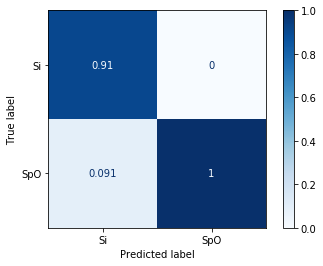

In [89]:
# Visualization

from sklearn import metrics 
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

title = '' 

classifier = clf
X_test = x_test

class_names = "WrO Tra SpO Si".split()


disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='pred')
disp.ax_.set_title(title)

print(title)
#plt.savefig("Kld_500_top"+'.png')
plt.show()

c=0
coff = clf.coef_ #clf.steps[1][1].coef_
coff = coff.data
tosort = []
for el in coff:
    tup=(abs(el),names[c])
    c+=1
    tosort.append(tup)
    #for feature in el: print(round(feature),3)
    #print(round(el[0],3), round(el[1],3), round(el[2],3))#, round(el[3],3))
    
tosort.sort()
tosort.reverse()
for el in tosort: print(el)

In [ ]:
# Feature Exploration

In [90]:
# We try to gather the most representative features used by the SVM to tell
# one class from another

values_array = clf.coef_.toarray()

used=[]

c=0
classes = set(Y)
names = vectorizer.get_feature_names()

classmap = {2:'Tra', 3:'Wr orig'} ## uncomment if focusing on written
#classmap = {0:'Int',1:'Sp orig'} ## uncomment if focusing on spoken
#classmap = {0:'Int', 1:'Sp orig', 2:'Tra', 3:'Wr orig'} ## uncomment if using all 4 classes

for y in classes:
    for y_ in classes:
        if y!=y_ and (y_,y) not in used: 
            print("\n",classmap[y], "vs.", classmap[y_],"&",end=" ")
            used.append((y,y_))
            values = values_array[c]
            values_and_names = [(round(values[i],4), names[i]) for i in range(len(names))]
            values_and_names.sort()
            top=values_and_names[:10]
            for el in top: print(el[1],"("+str(round(el[0],3))[1:]+")",end=", ")
            print("\\\\")
            c+=1


 Tra vs. Wr orig & my (0.071), our (0.064), farmers (0.061), welcome (0.057), at (0.056), debate (0.056), was (0.055), hm (0.053), as (0.052), their (0.052), \\


In [91]:
# writing it out

#out = open('/Users/yuribizzoni/Documents/.txt','w')
for el in values_and_names[:1000]: 
    out.write(el[1]+"("+str(el[0])[:]+")"+"\n")

out.close()

NameError: name 'out' is not defined

In [93]:
print(disp.confusion_matrix)
np.mean(scores), np.std(scores)

[[0.90909091 0.        ]
 [0.09090909 1.        ]]


(0.8330251270468662, 0.09791291738078269)